# Patient Readmission Prediction Pipeline with Explainability and API

This notebook demonstrates the following steps:
- Data Loading and Exploration
- Exploratory Data Analysis (EDA)
- Data Preprocessing, Feature Engineering and Encoding
- Splitting Data and Scaling Features
- Training Multiple Models and Evaluation
- Model Explainability with SHAP
- Saving the Pipeline for Inference
- Creating a Flask API for predictions

Each section is documented and explained for clarity.


In [1]:
# Import necessary libraries for data manipulation, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn libraries for preprocessing, model training, and evaluation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, recall_score,precision_score, f1_score, confusion_matrix, roc_auc_score)
import joblib

# Import SHAP for model explainability
import shap


Explanation:
This cell loads all the libraries required for data handling, visualization, modeling, evaluation, explainability, and API creation.

In [2]:
# Define the path to the dataset (adjust the path as needed)
DATA_PATH = "D:/Hospital_Readmissions.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(DATA_PATH)

# Display basic information and the first few rows of the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst five rows of the dataset:")
print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      25000 non-null  object
 1   time_in_hospital         25000 non-null  int64 
 2   n_lab_procedures         25000 non-null  int64 
 3   n_procedures             25000 non-null  int64 
 4   n_medications            25000 non-null  int64 
 5   n_outpatient             25000 non-null  int64 
 6   n_inpatient              25000 non-null  int64 
 7   n_emergency              25000 non-null  int64 
 8   medical_specialty        25000 non-null  object
 9   diag_1                   25000 non-null  object
 10  diag_2                   25000 non-null  object
 11  diag_3                   25000 non-null  object
 12  glucose_test             25000 non-null  object
 13  A1Ctest                  25000 non-null  object
 14  change           

Explanation:
In this cell, the dataset is loaded using pandas. We then check the data types and preview the first five rows to understand the structure of our data.



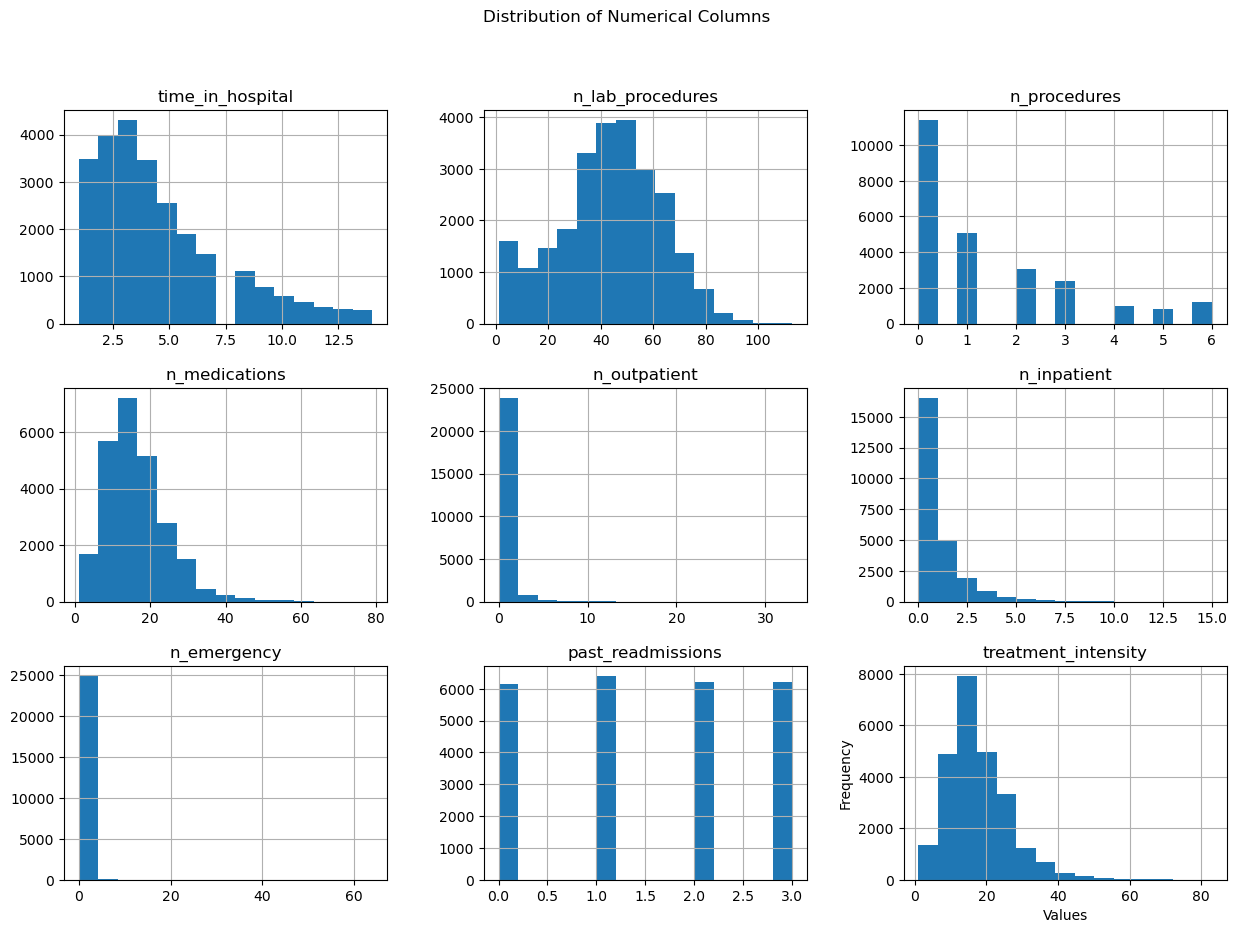

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


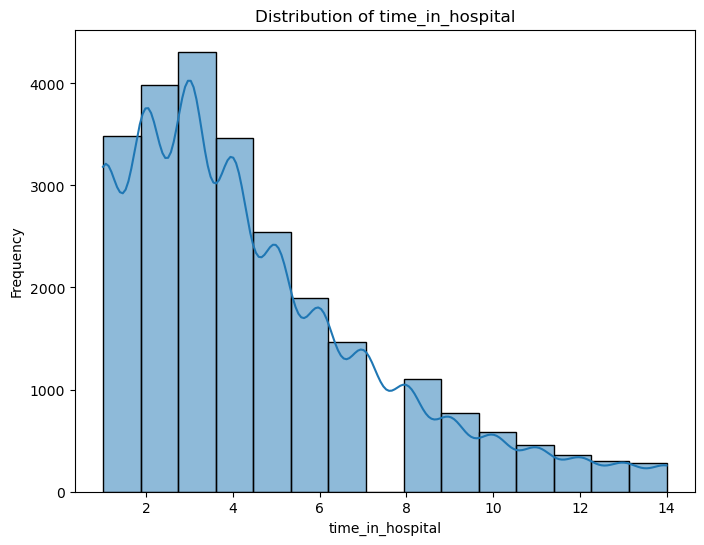

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


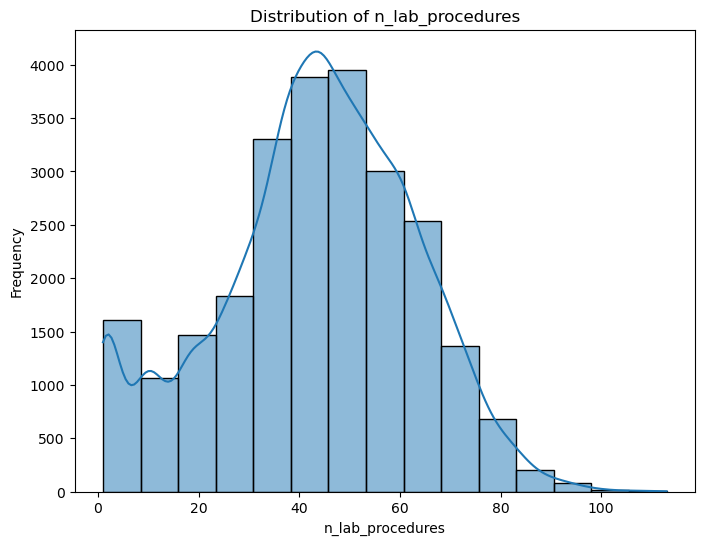

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


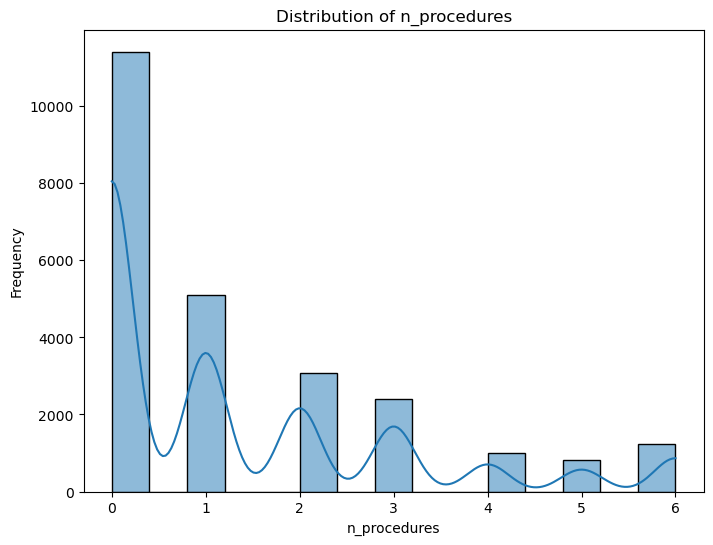

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


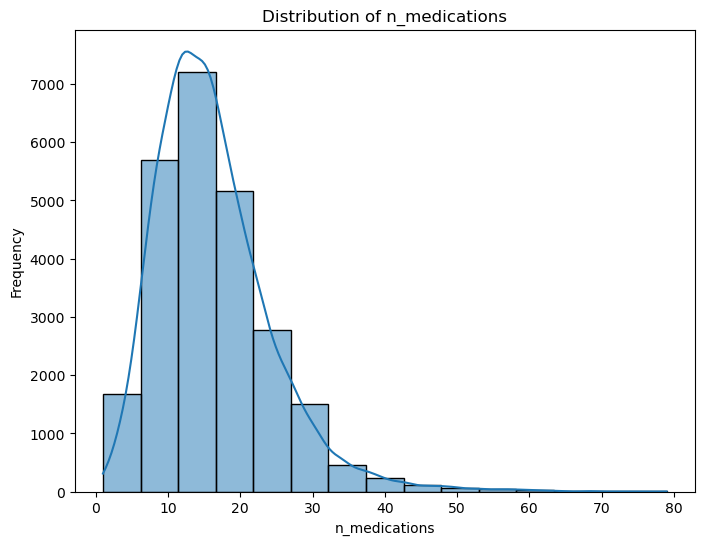

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


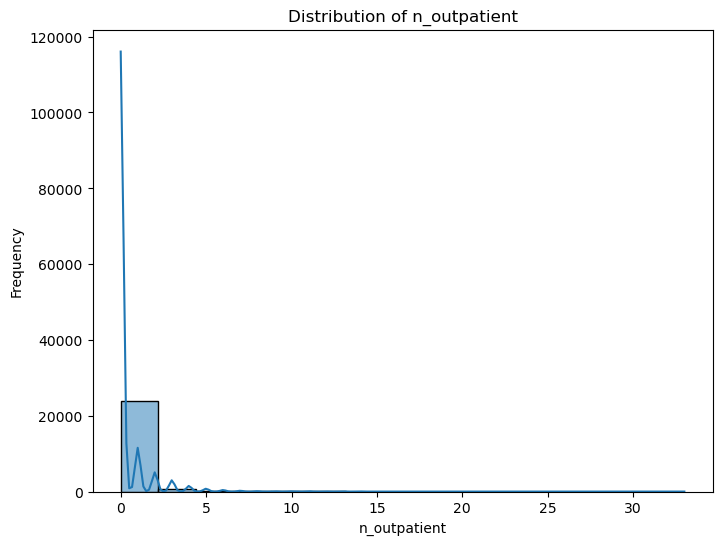

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


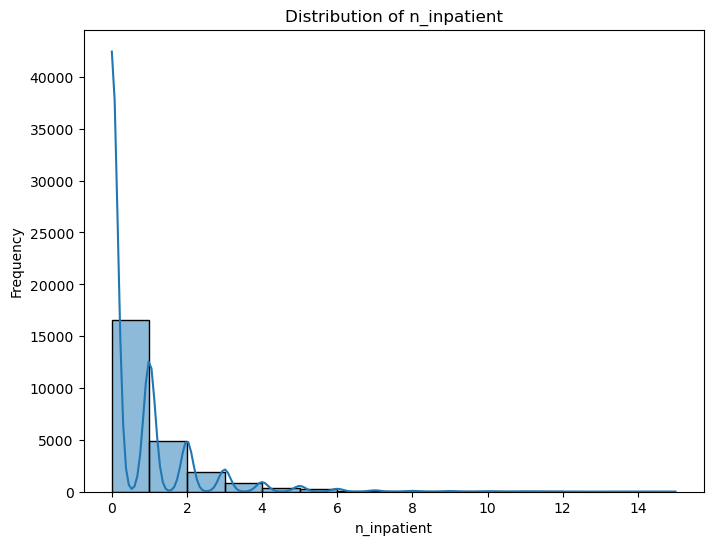

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


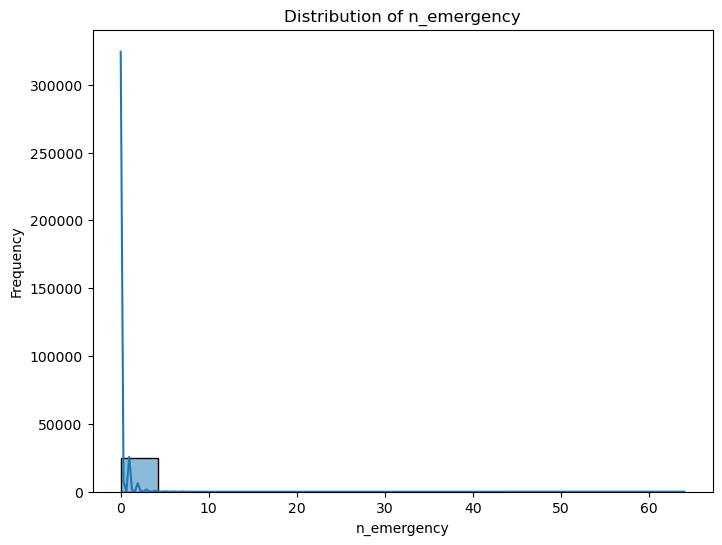

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


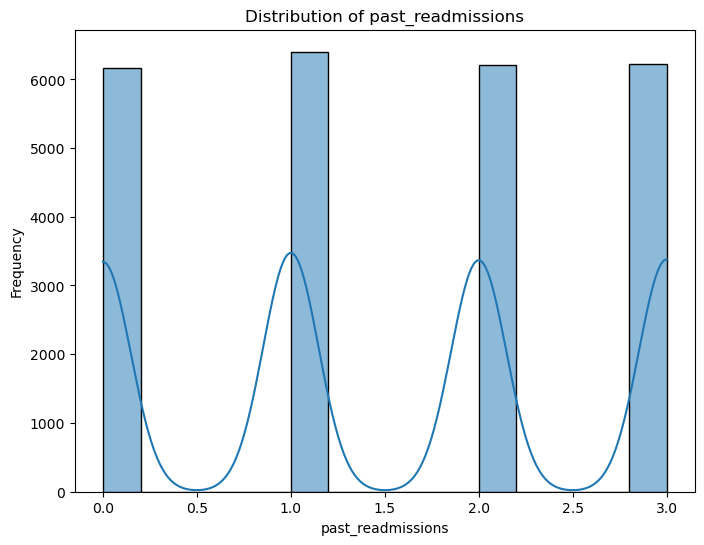

c:\Users\srini\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


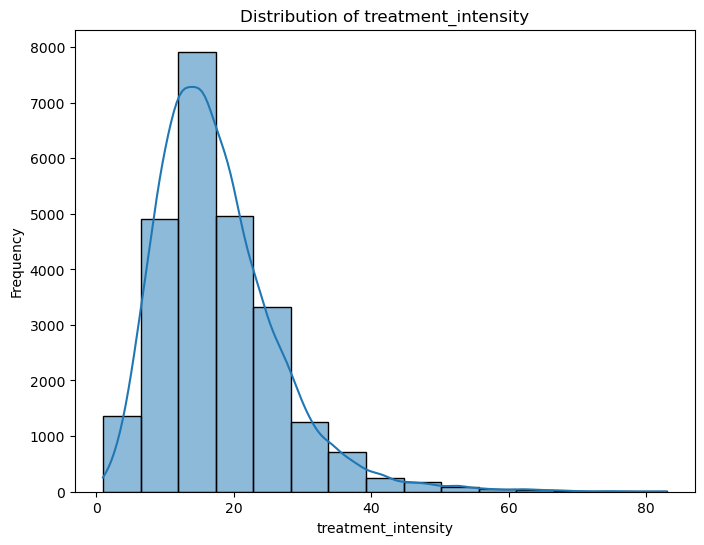

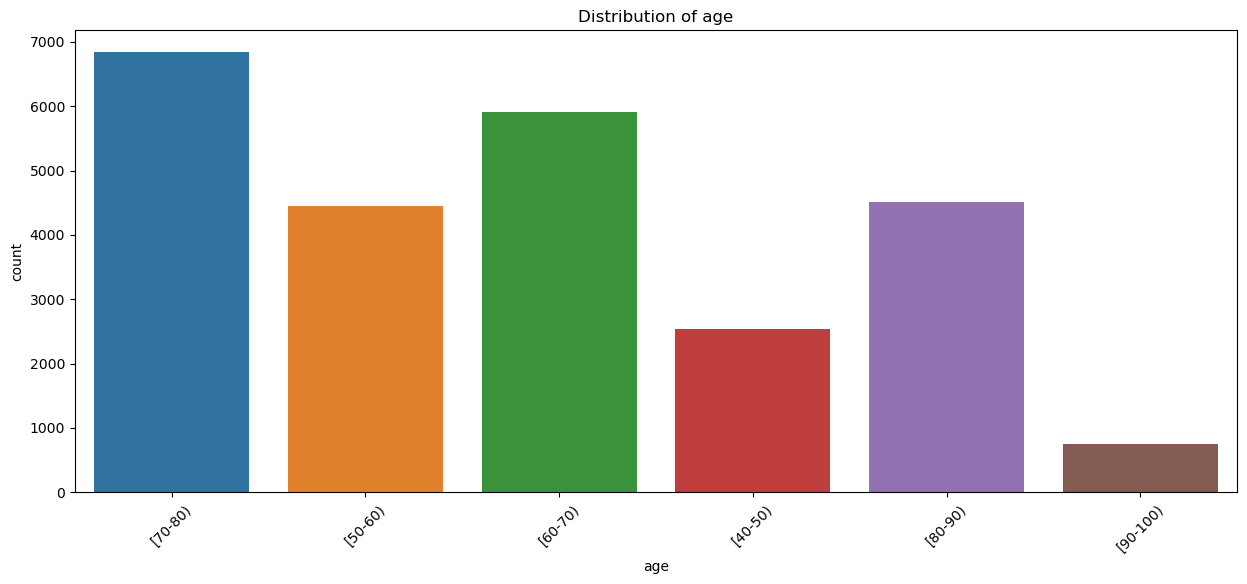

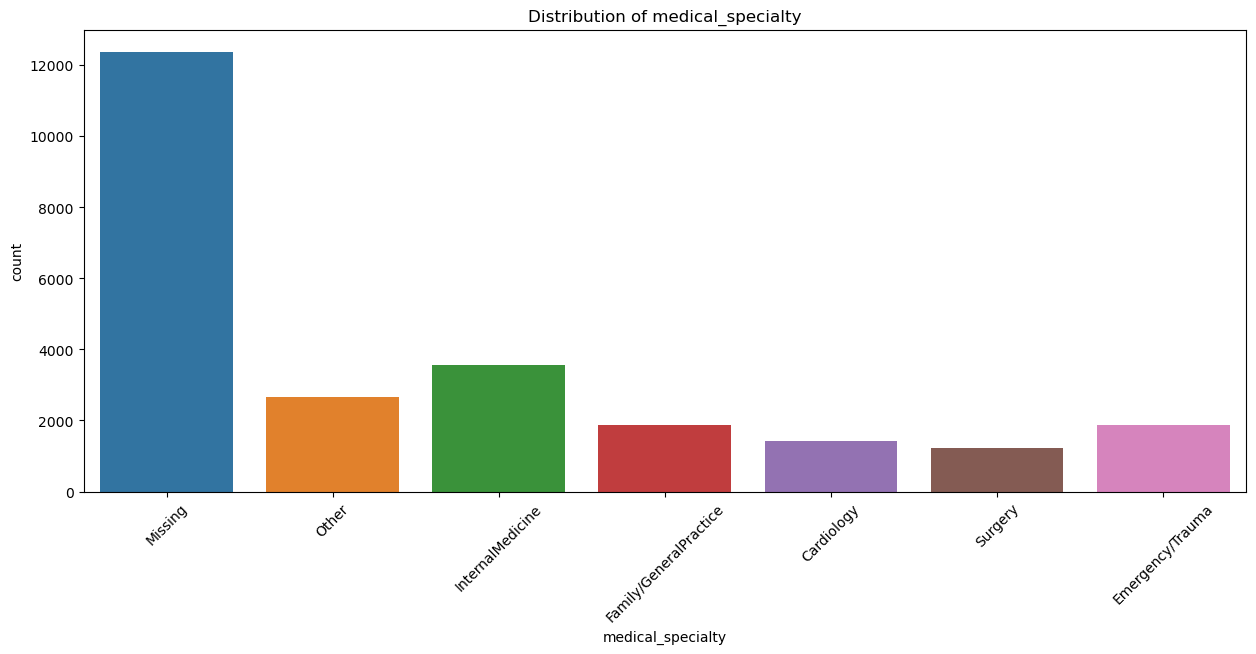

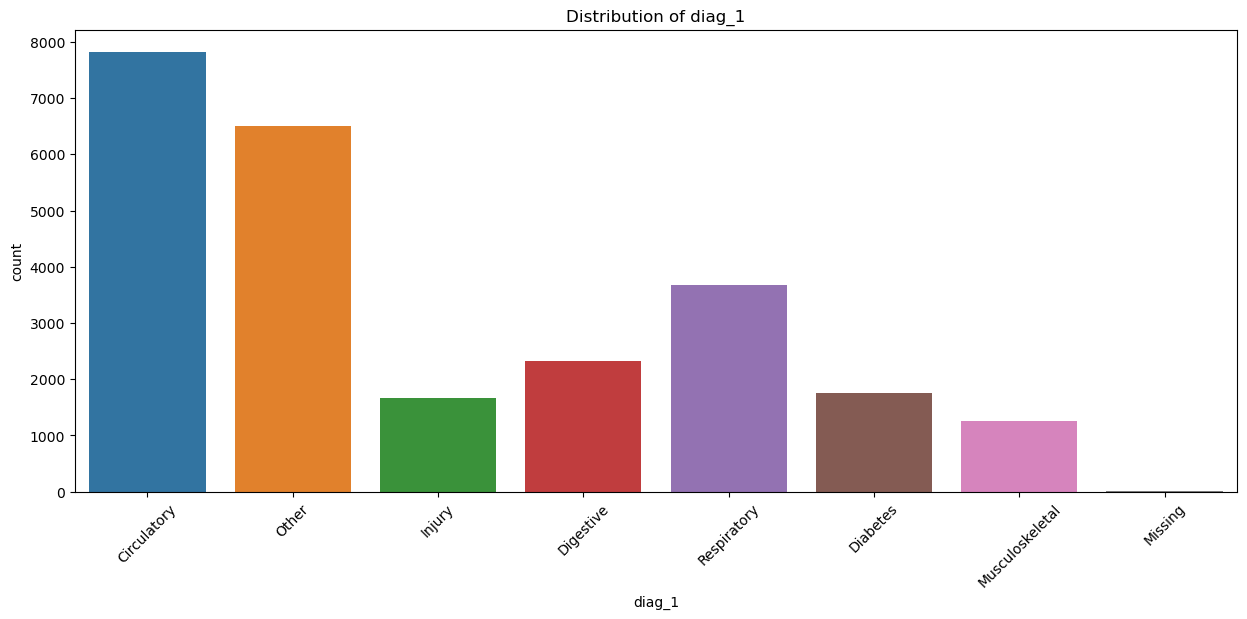

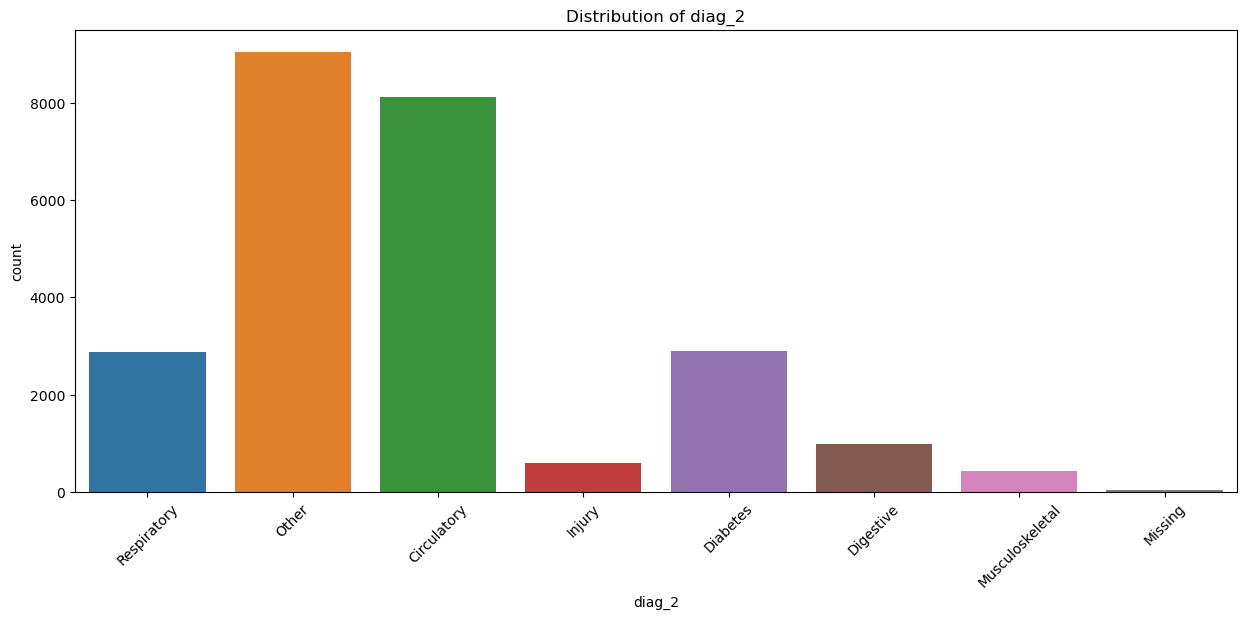

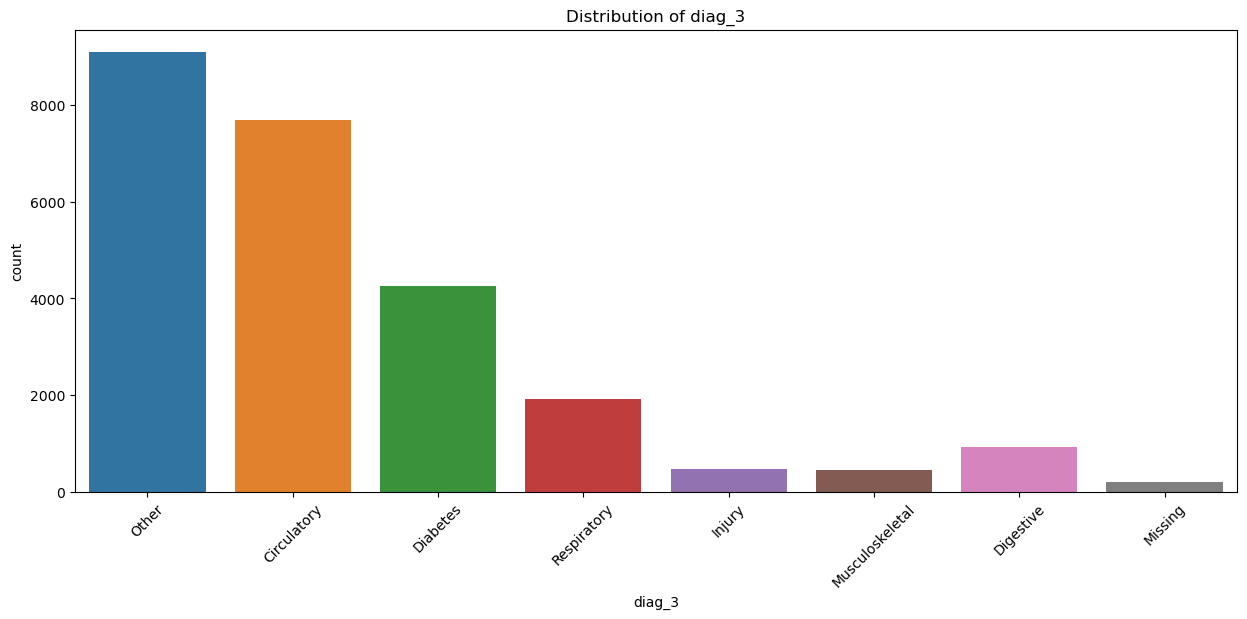

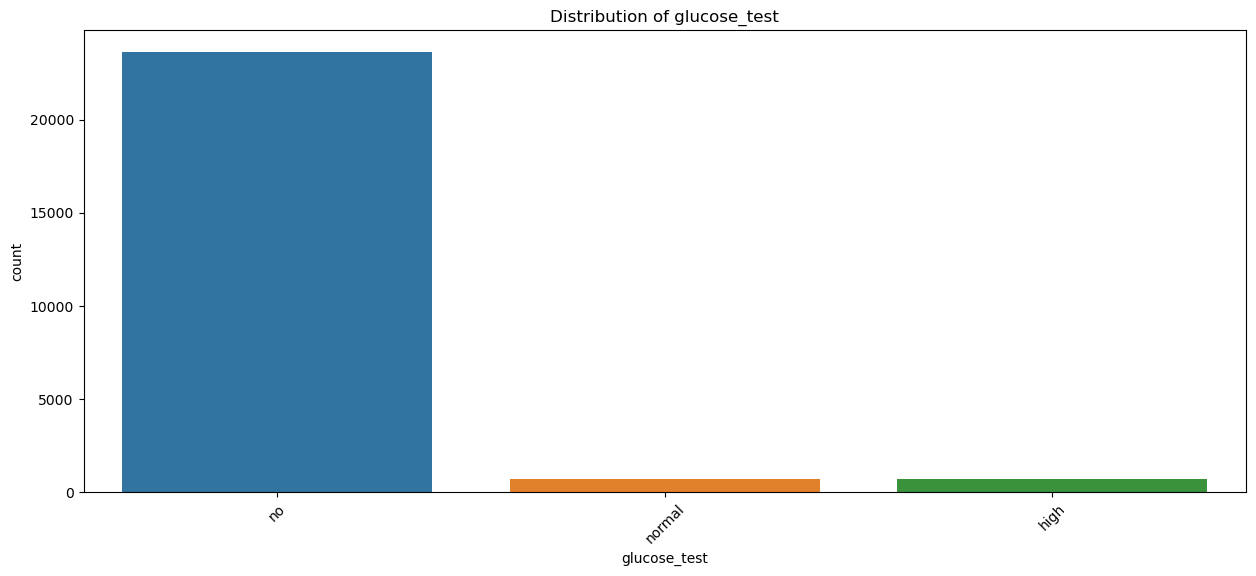

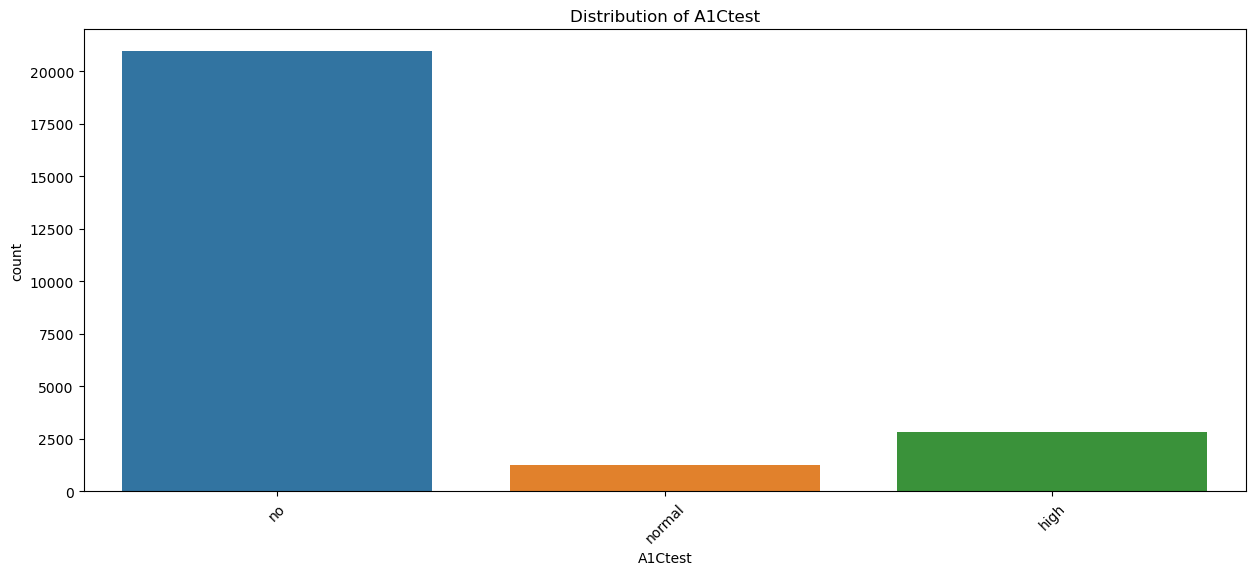

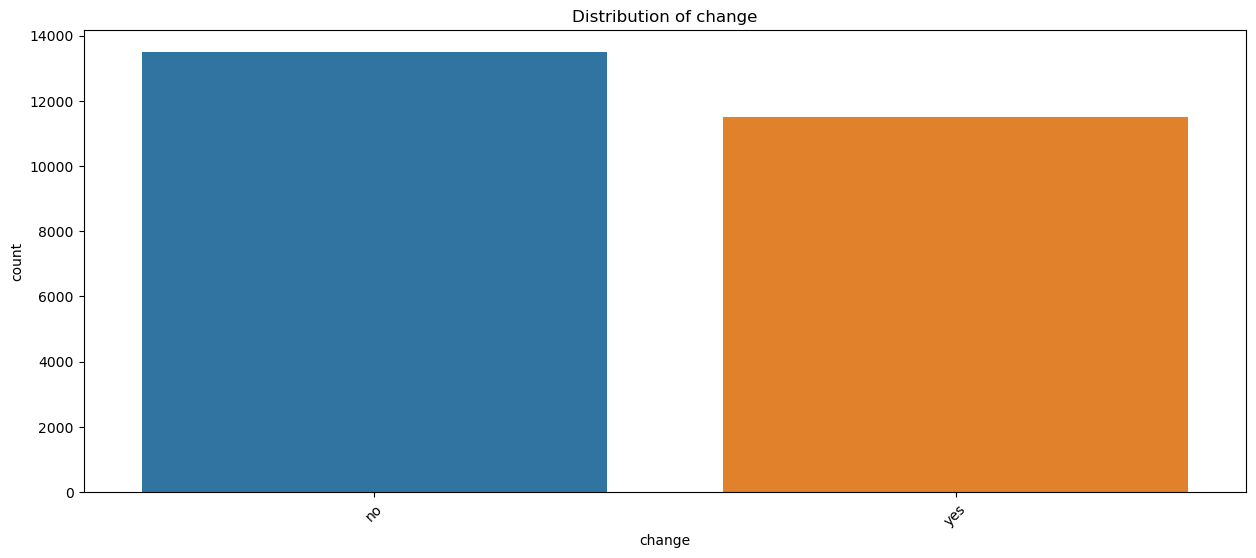

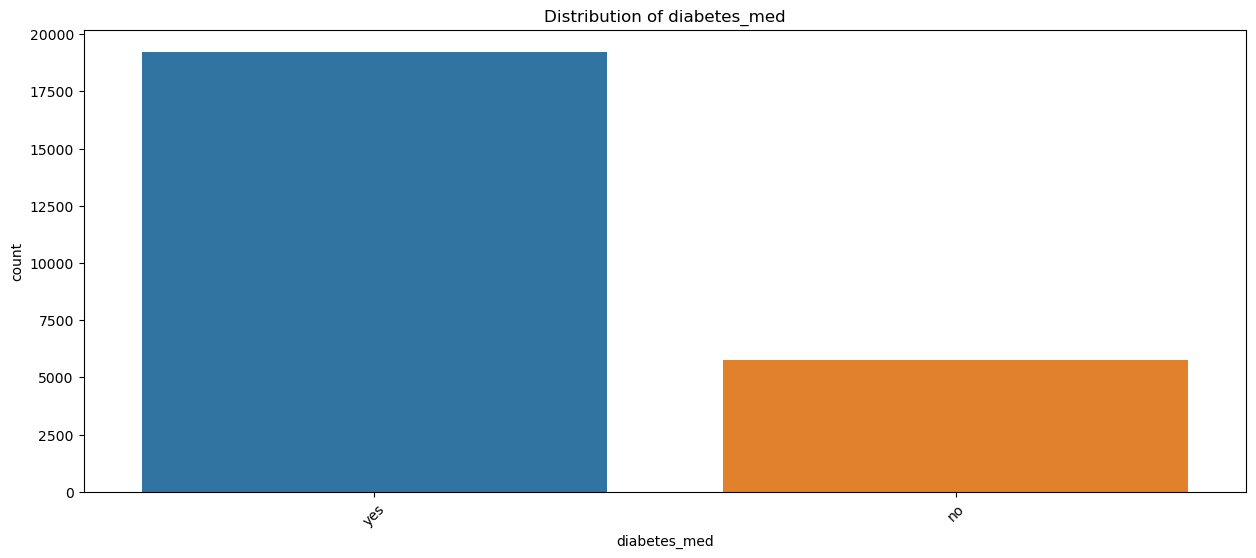

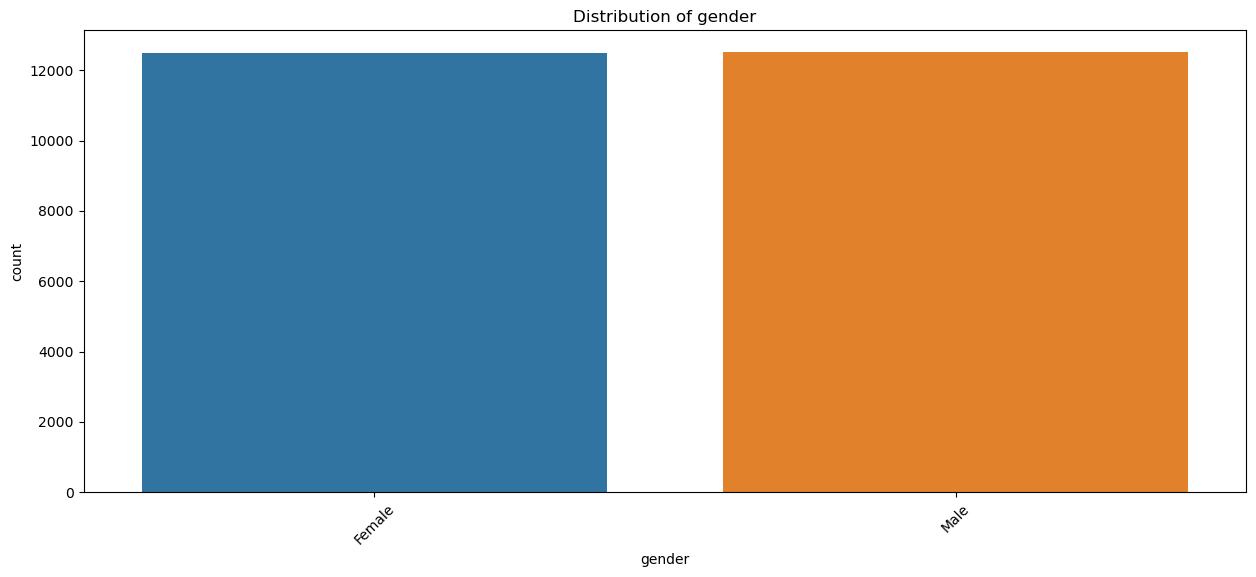

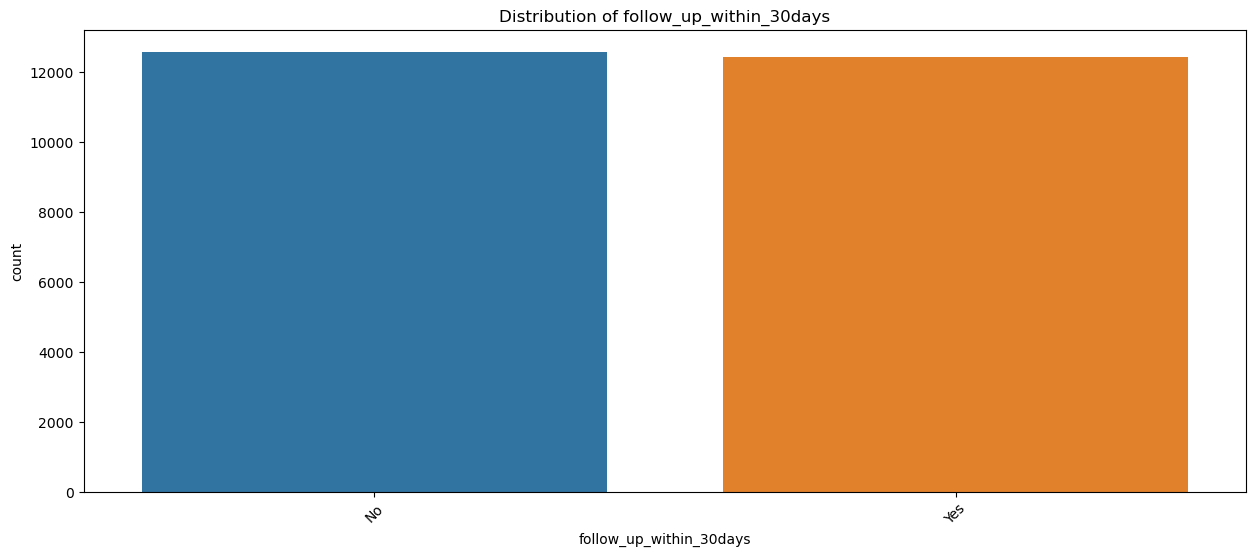

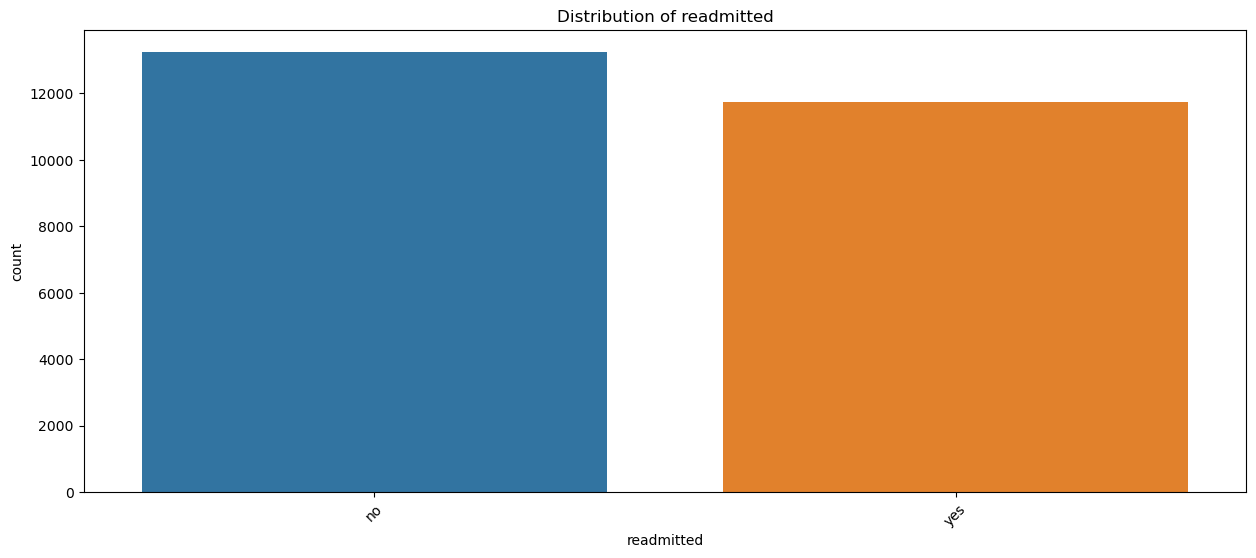

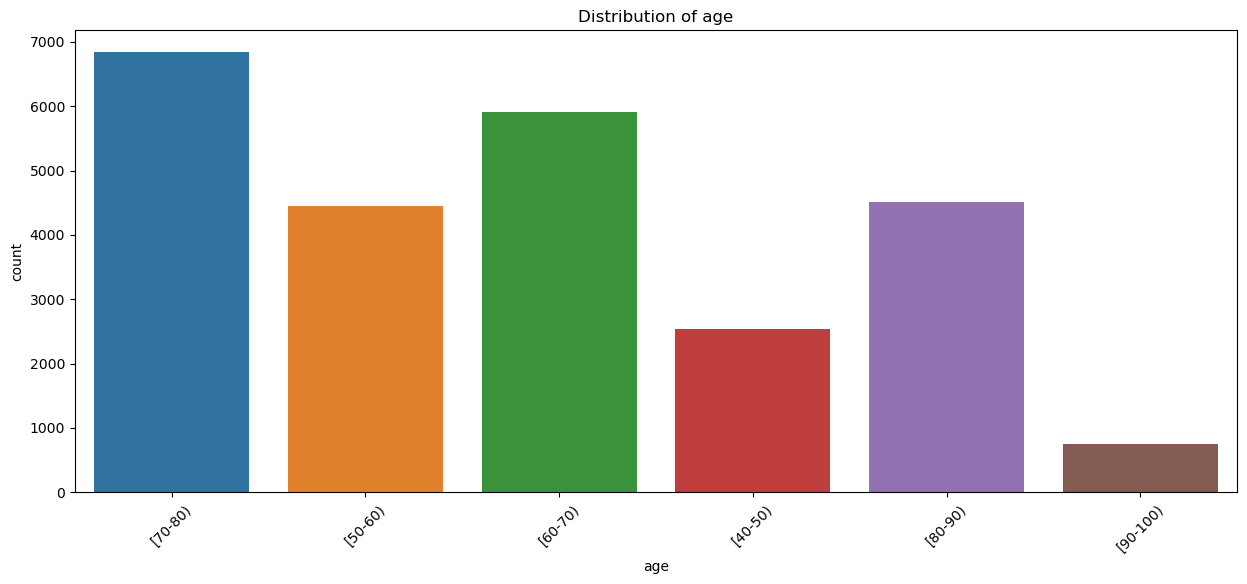

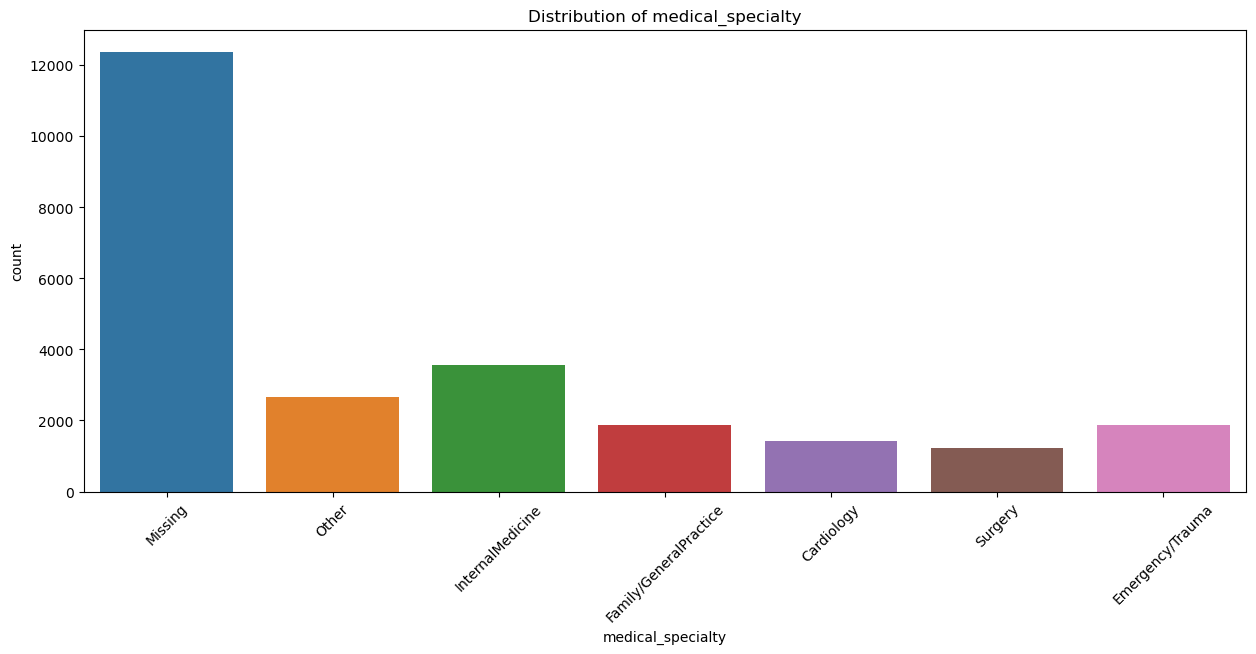

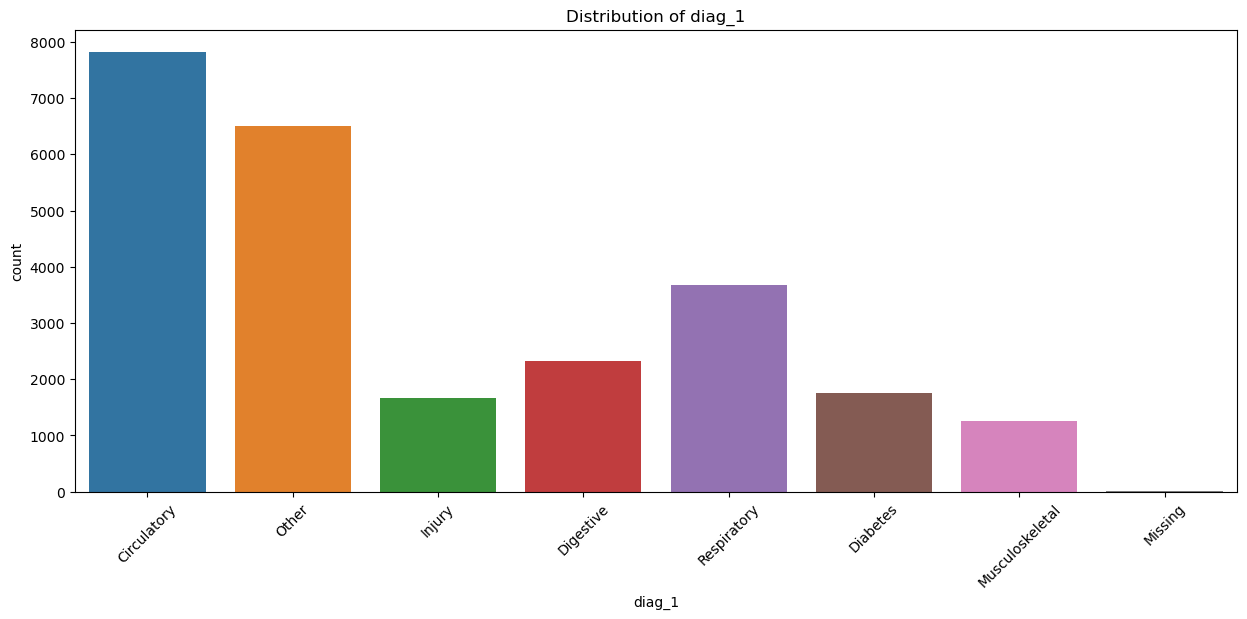

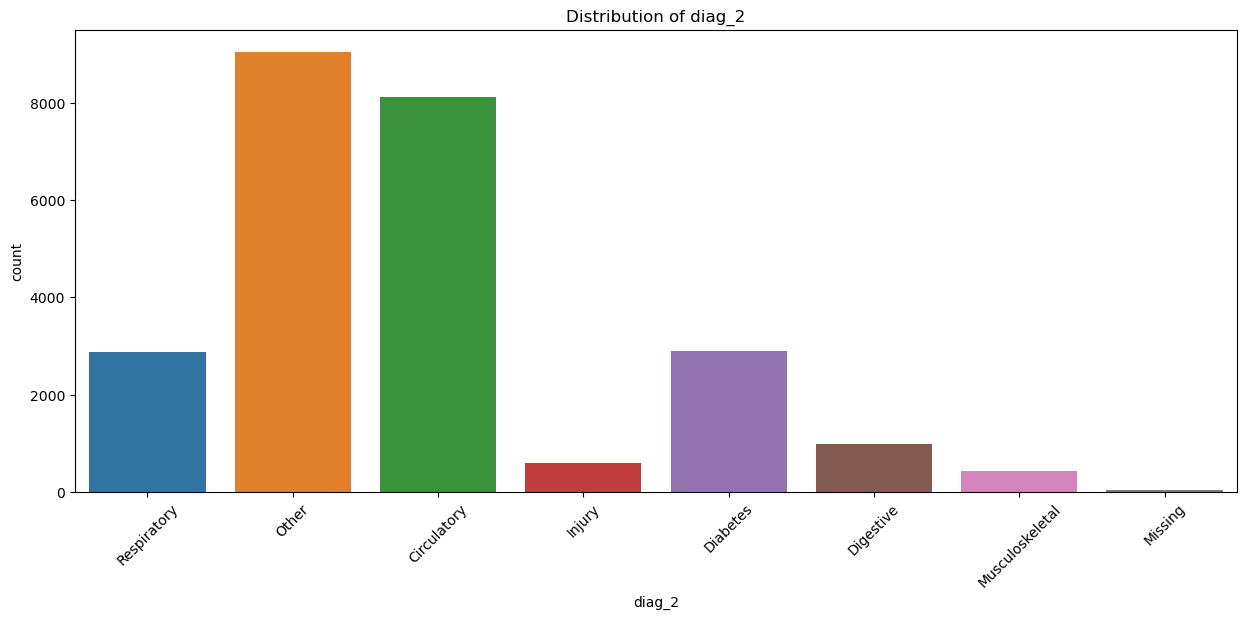

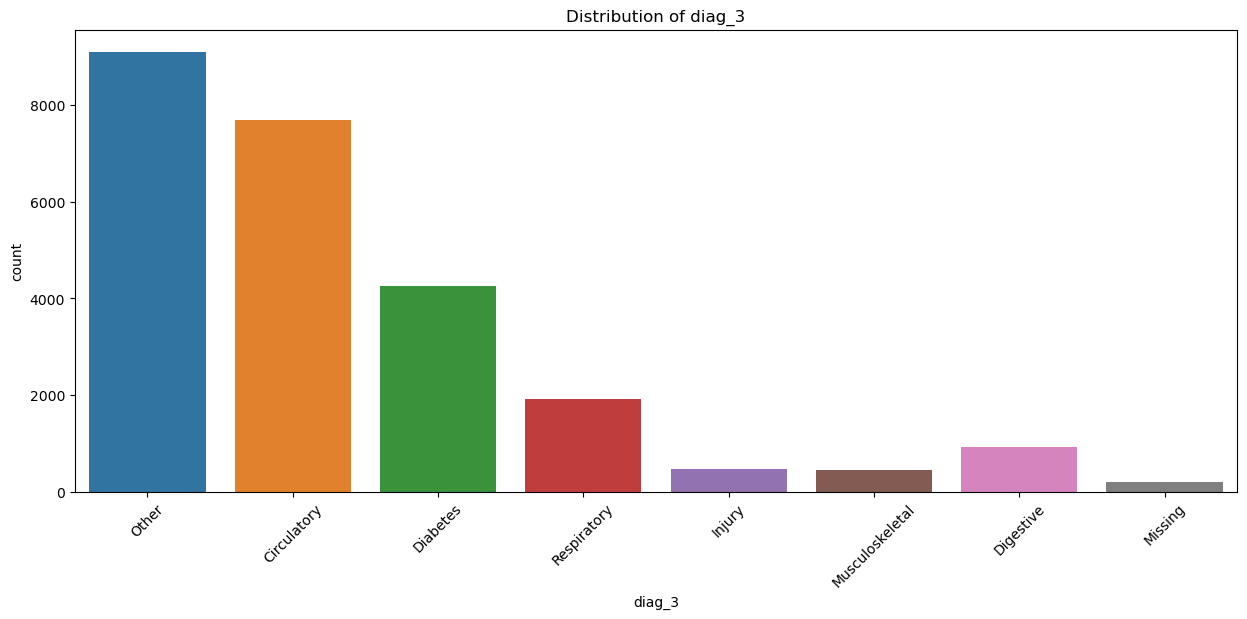

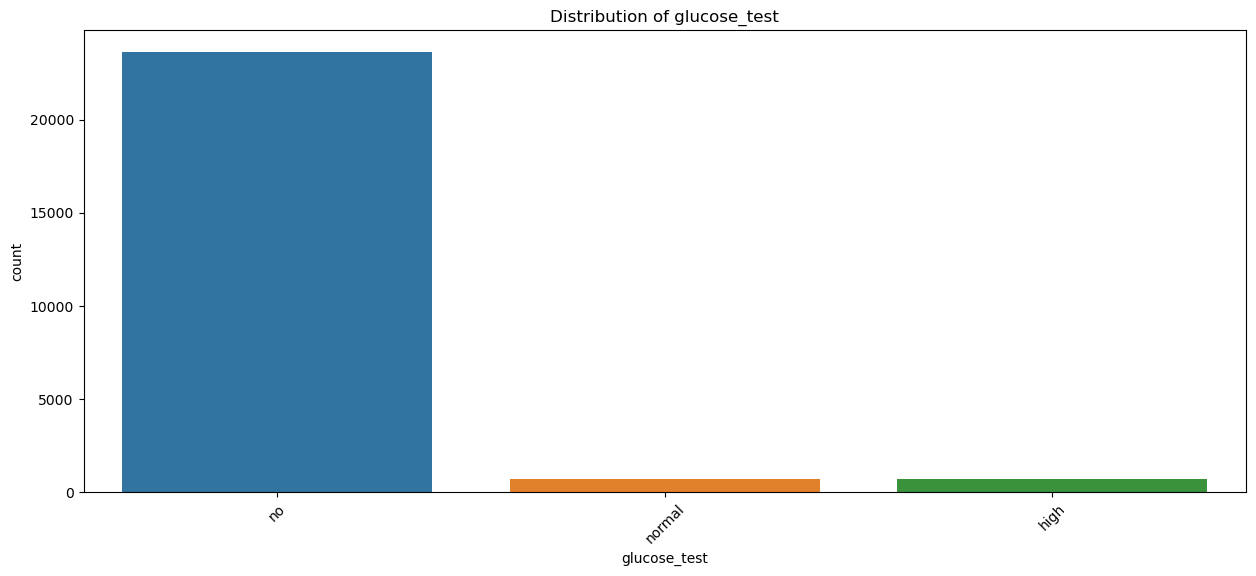

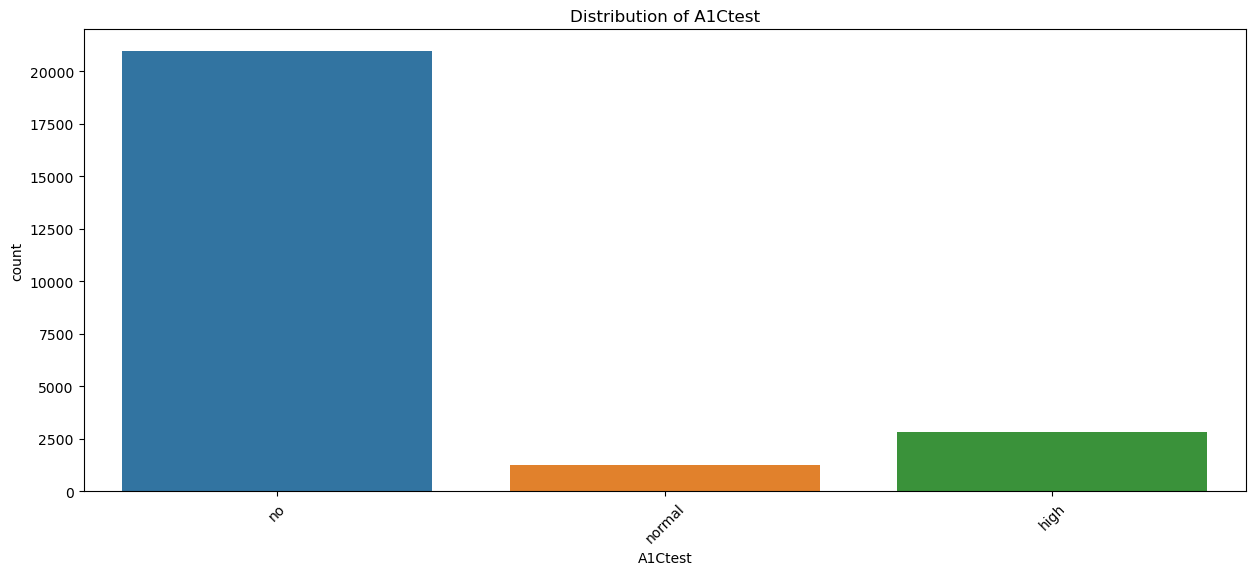

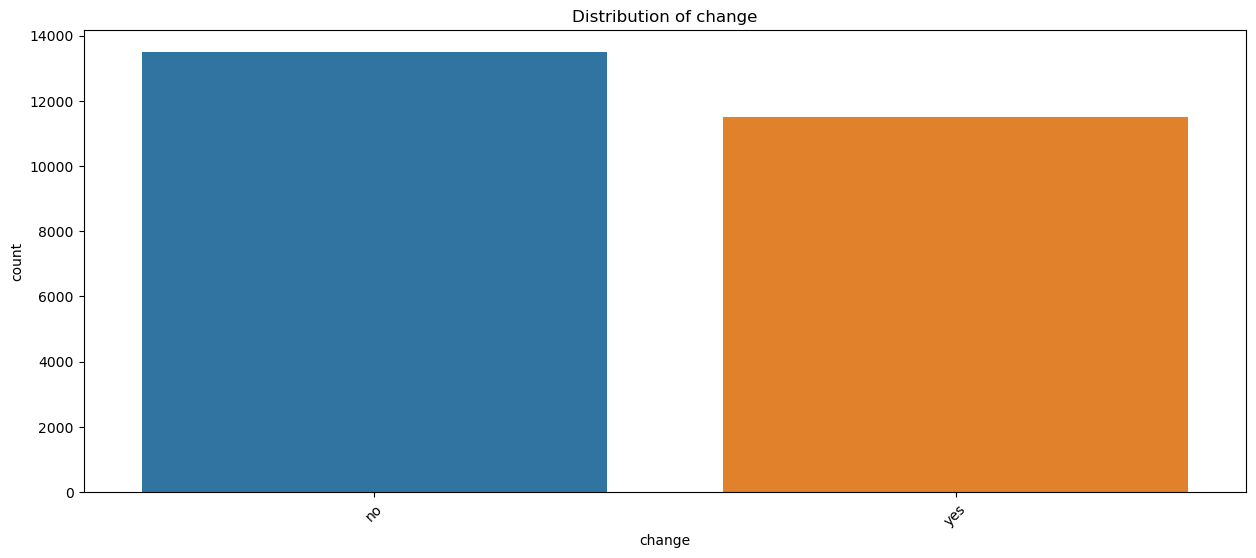

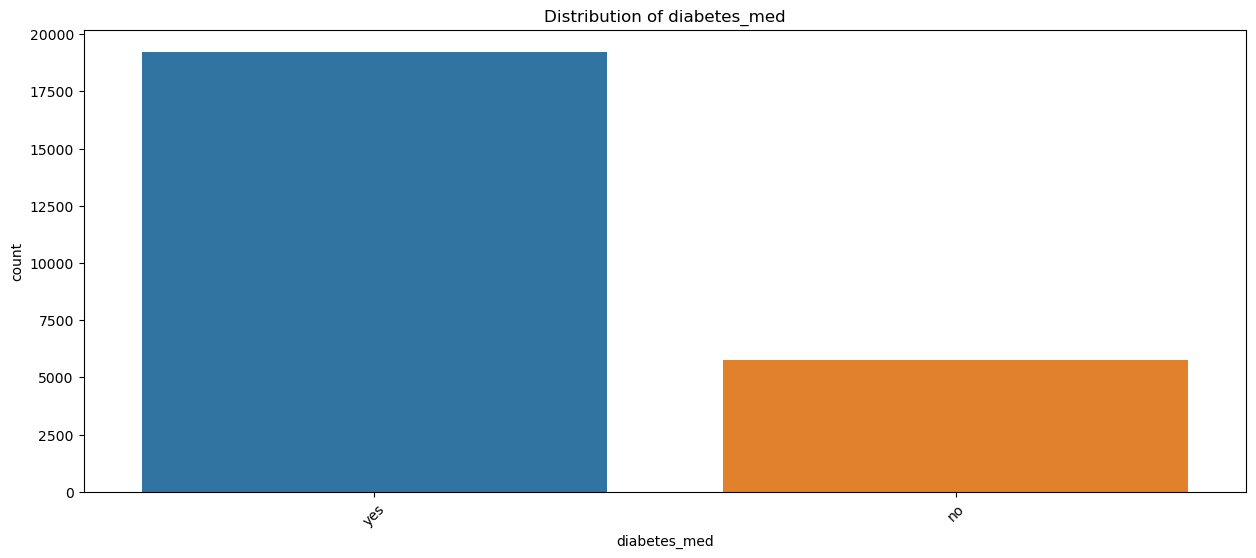

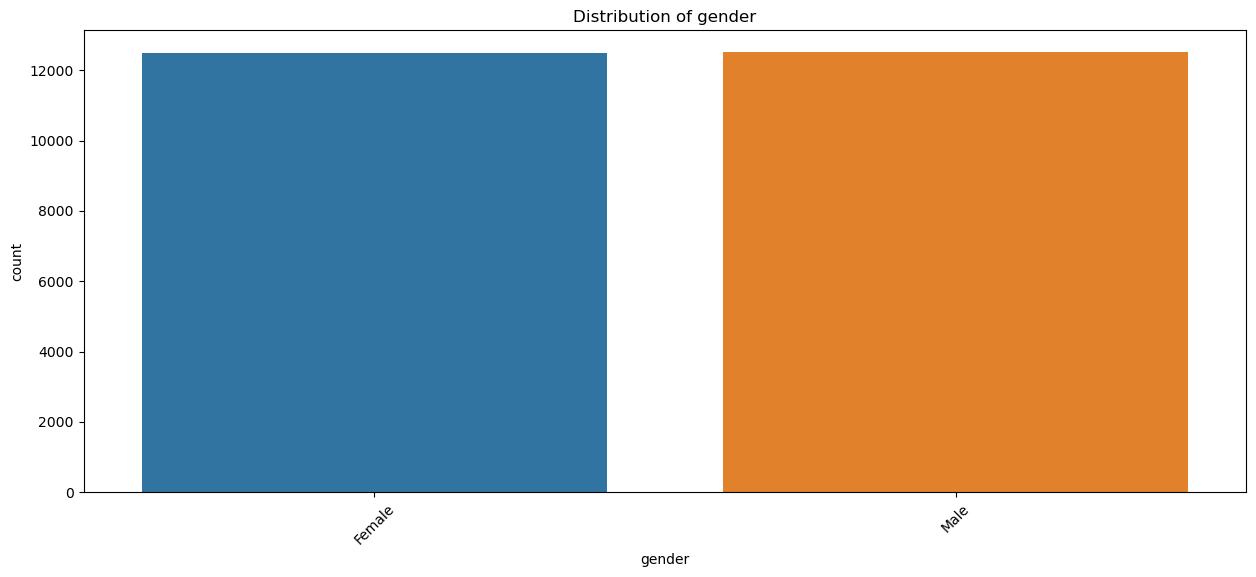

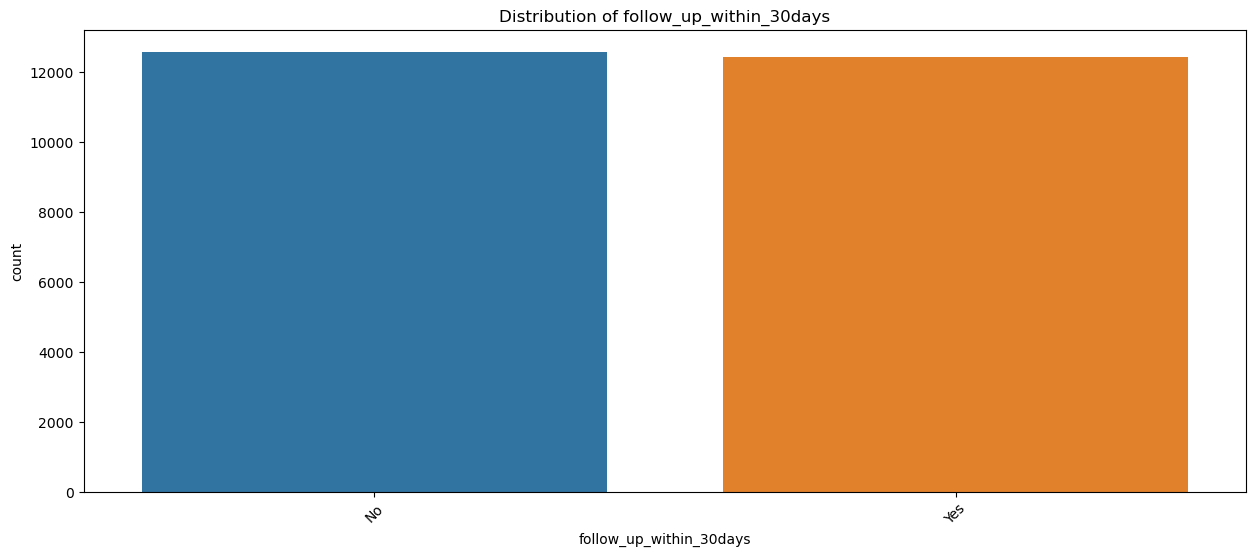

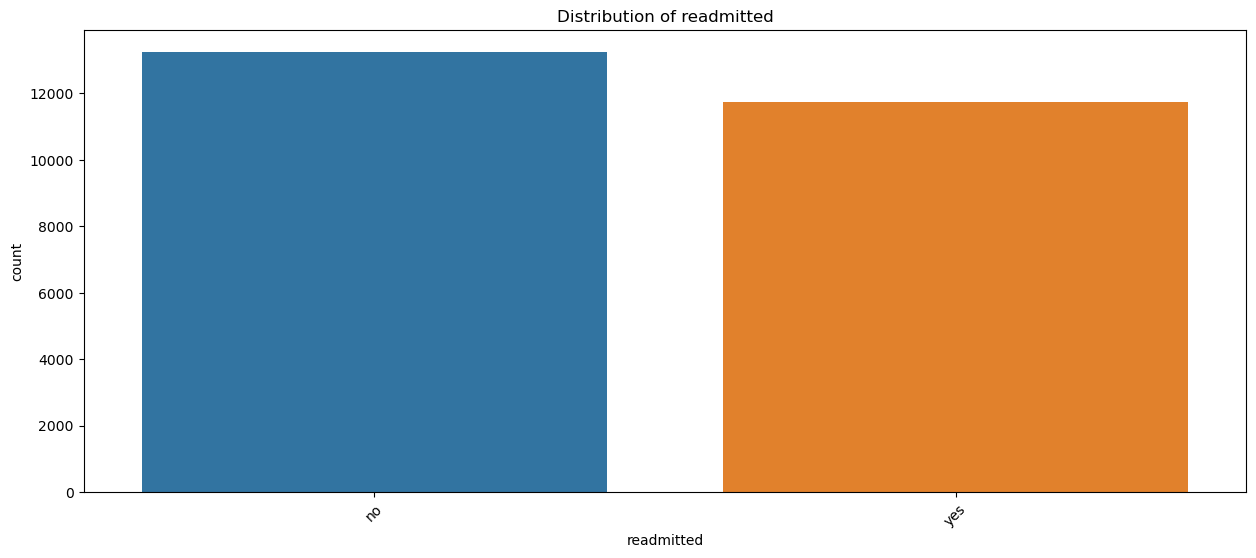

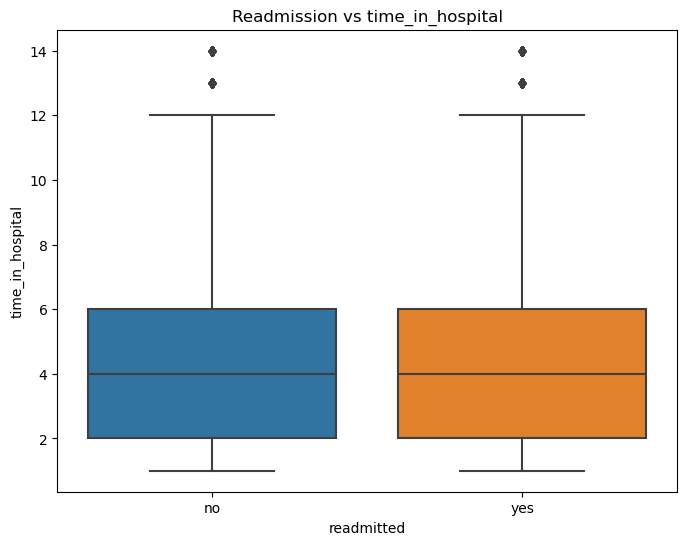

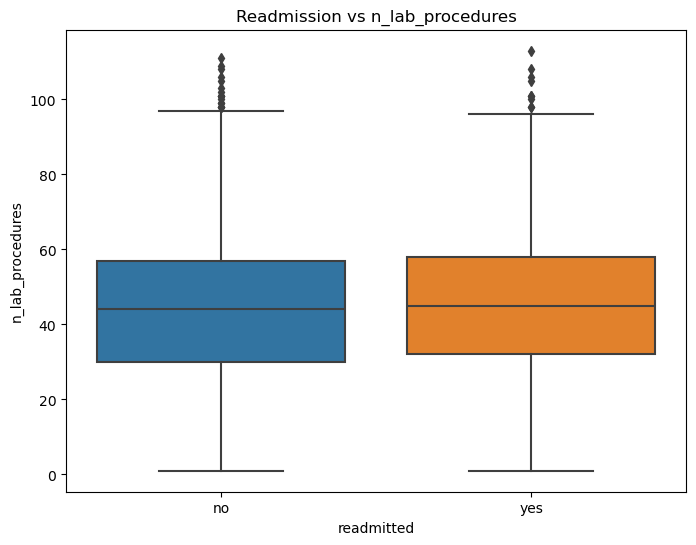

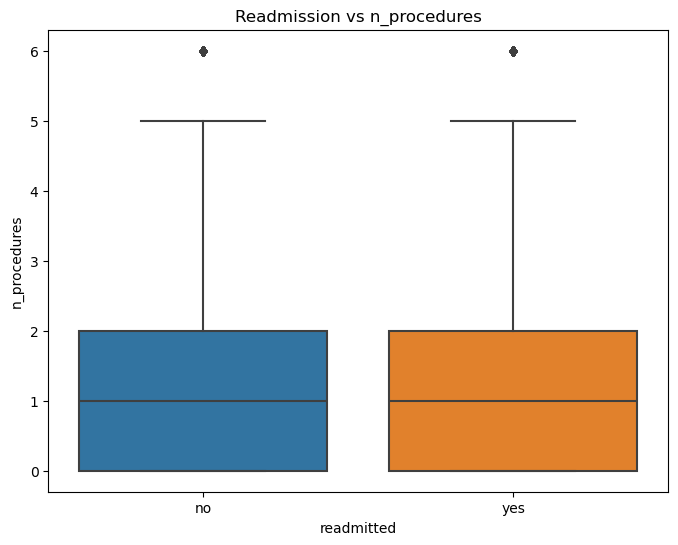

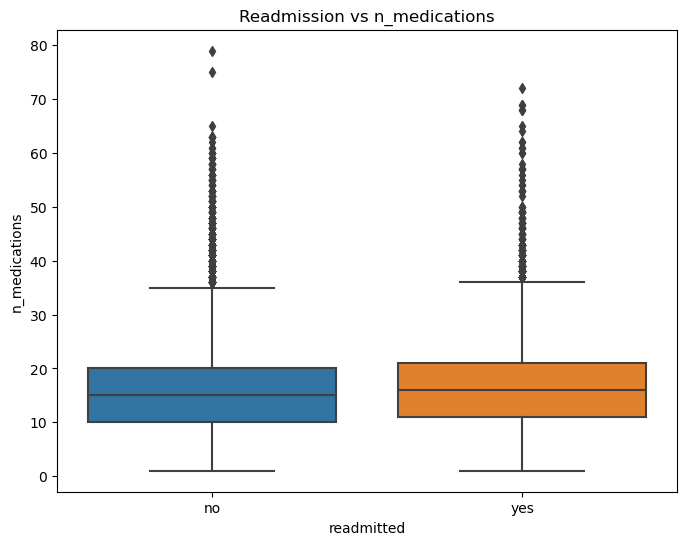

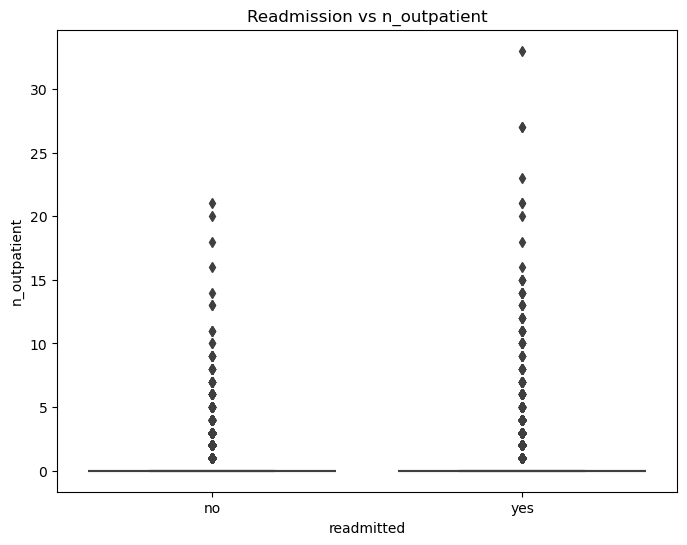

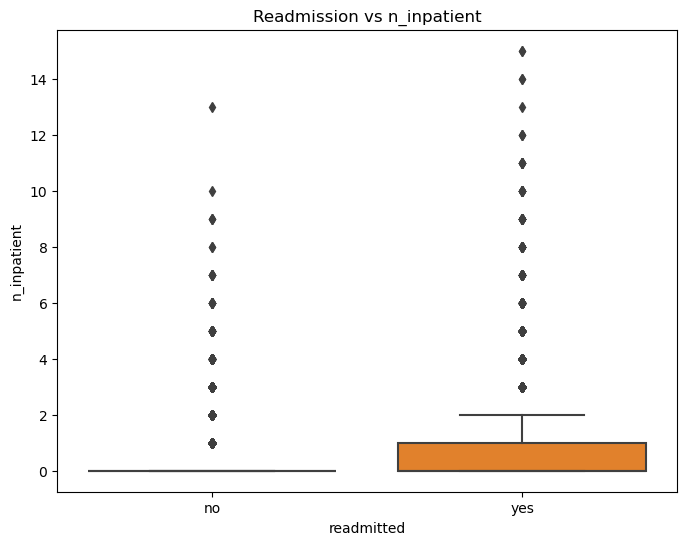

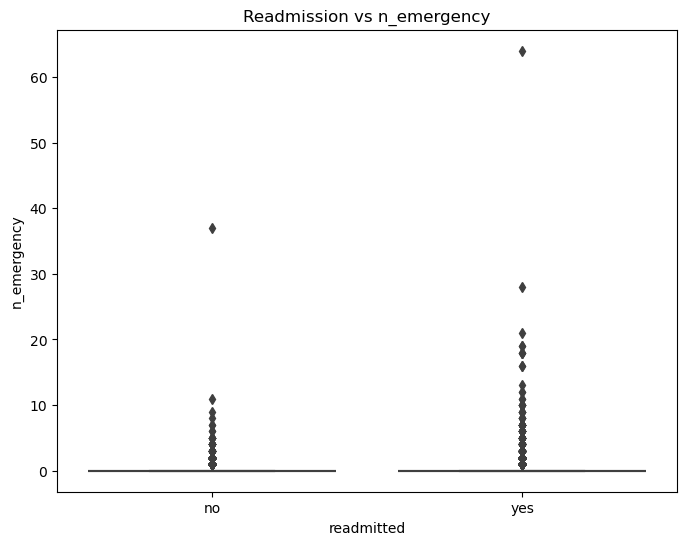

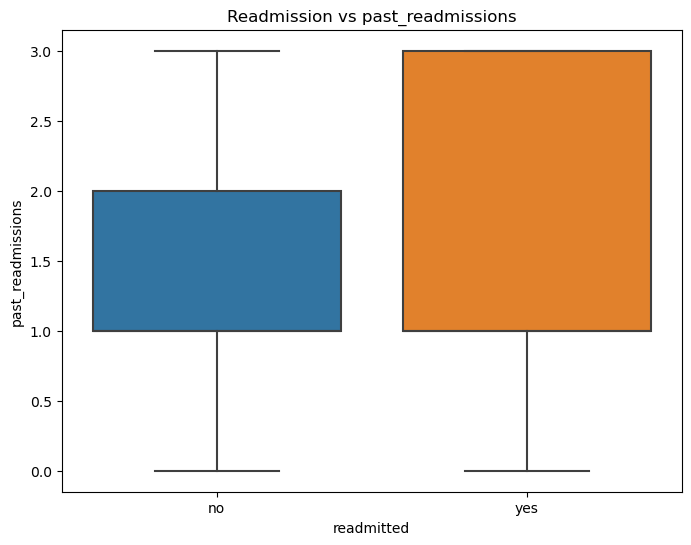

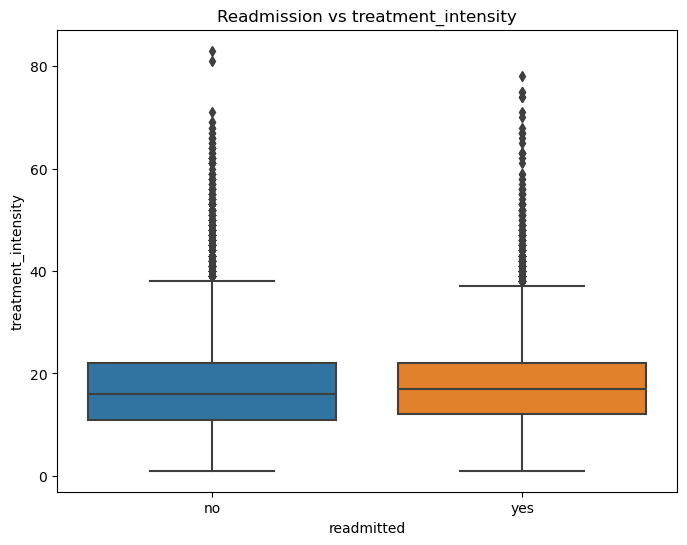

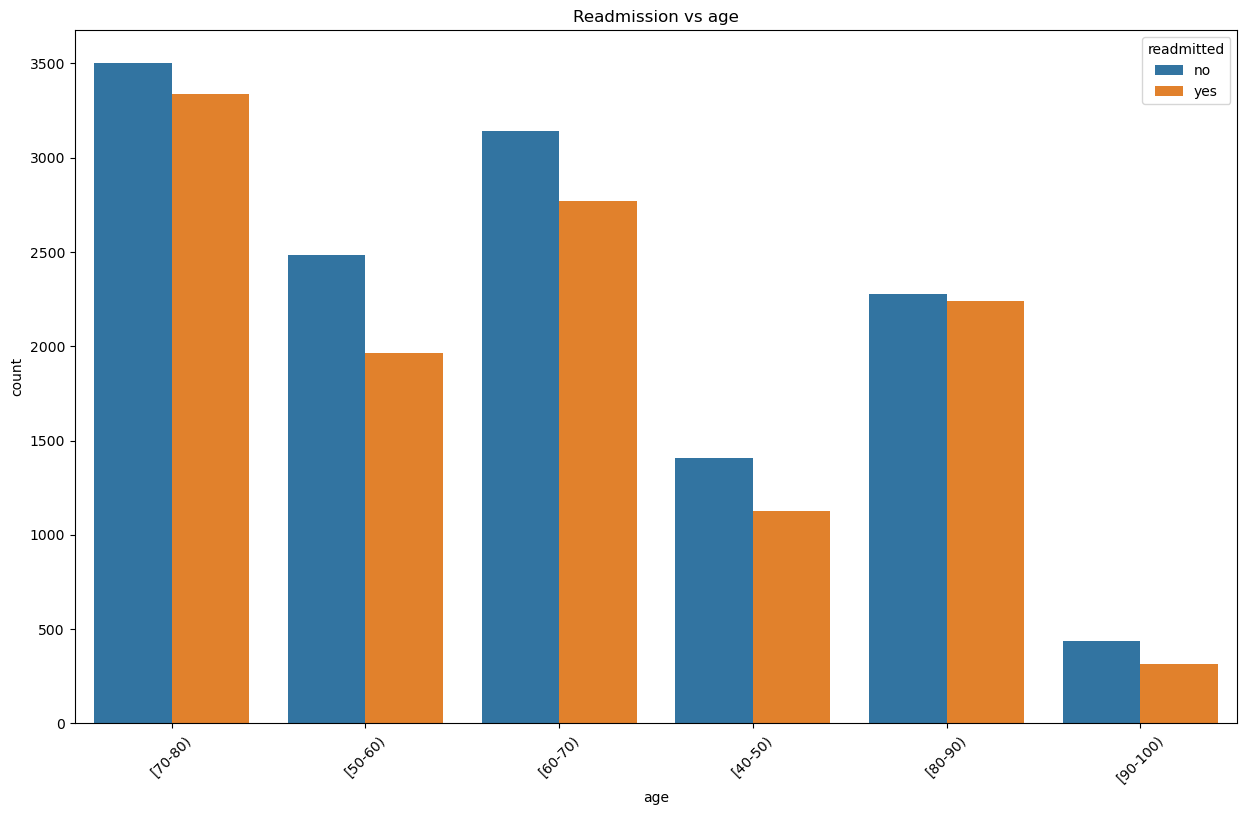

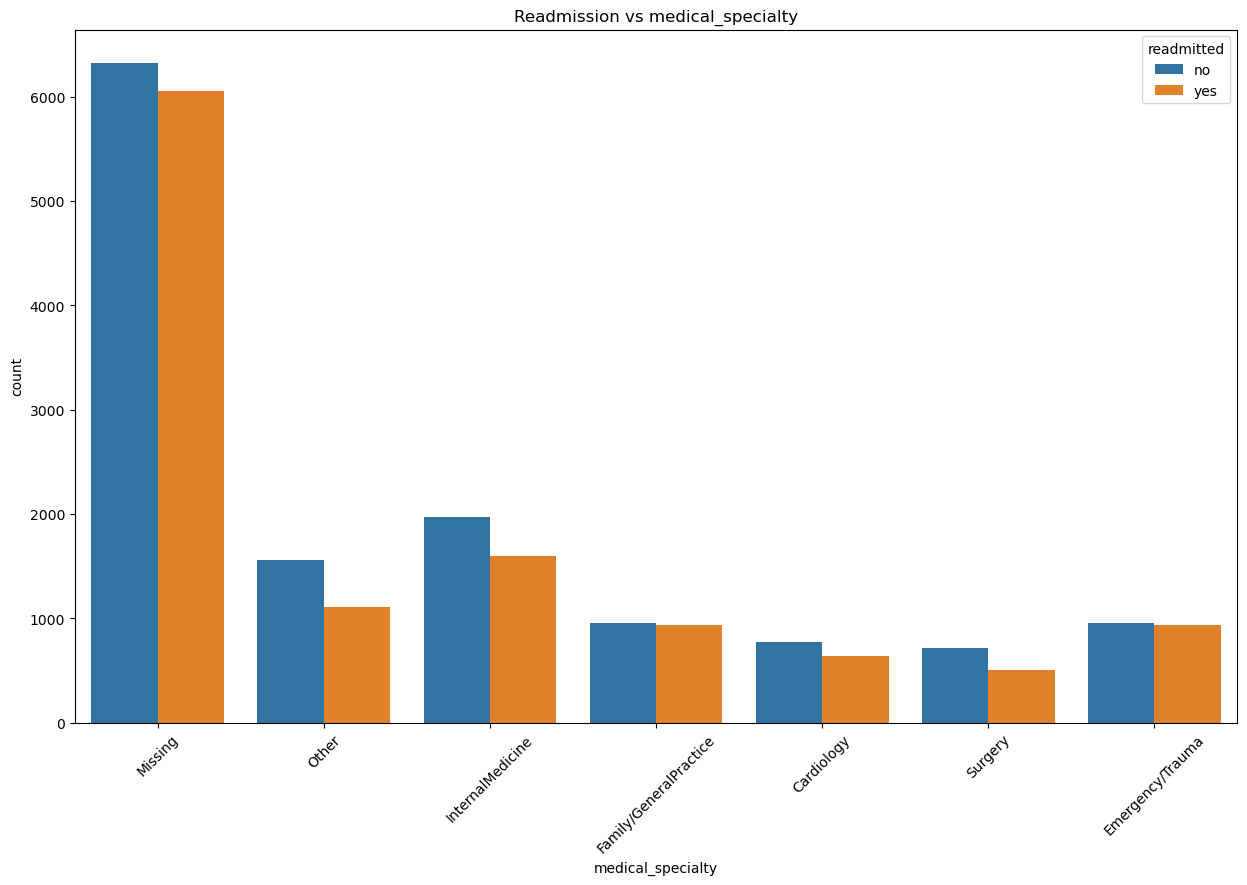

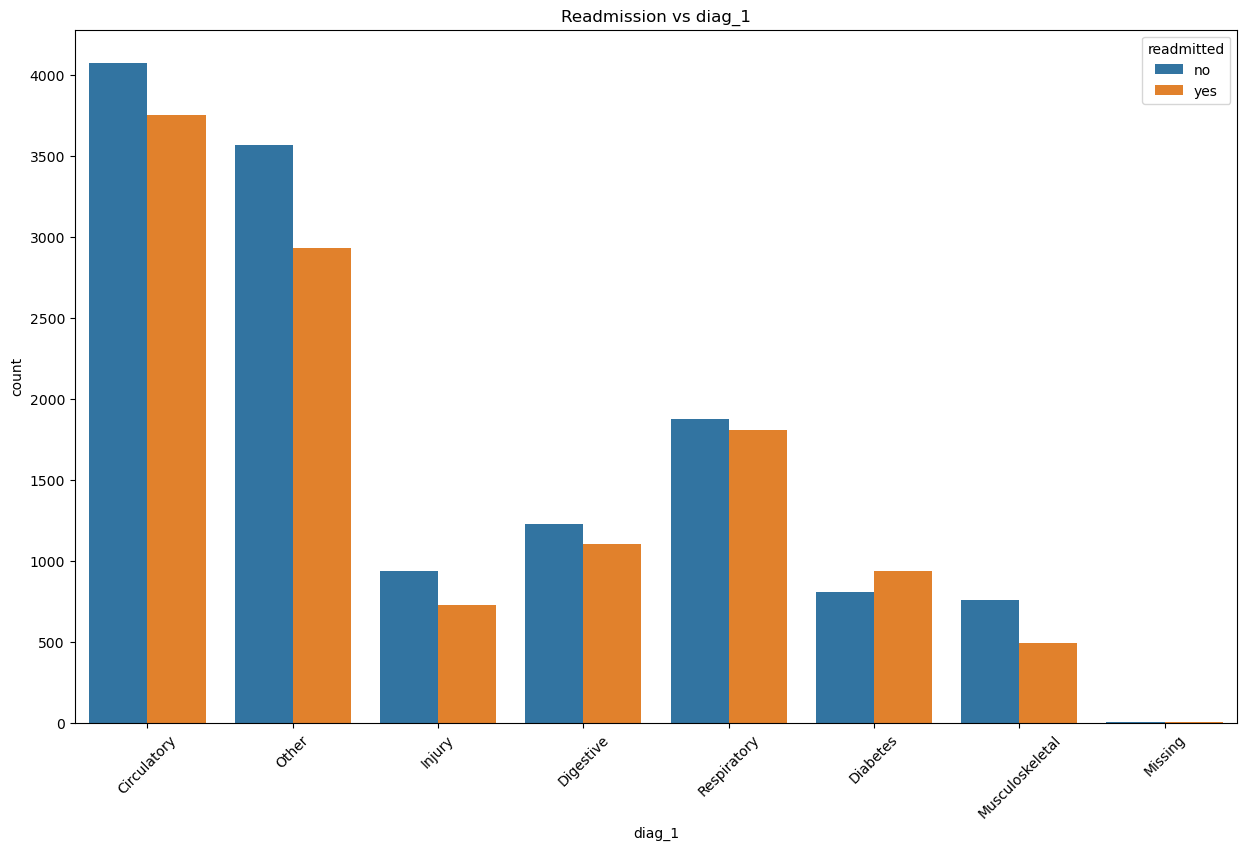

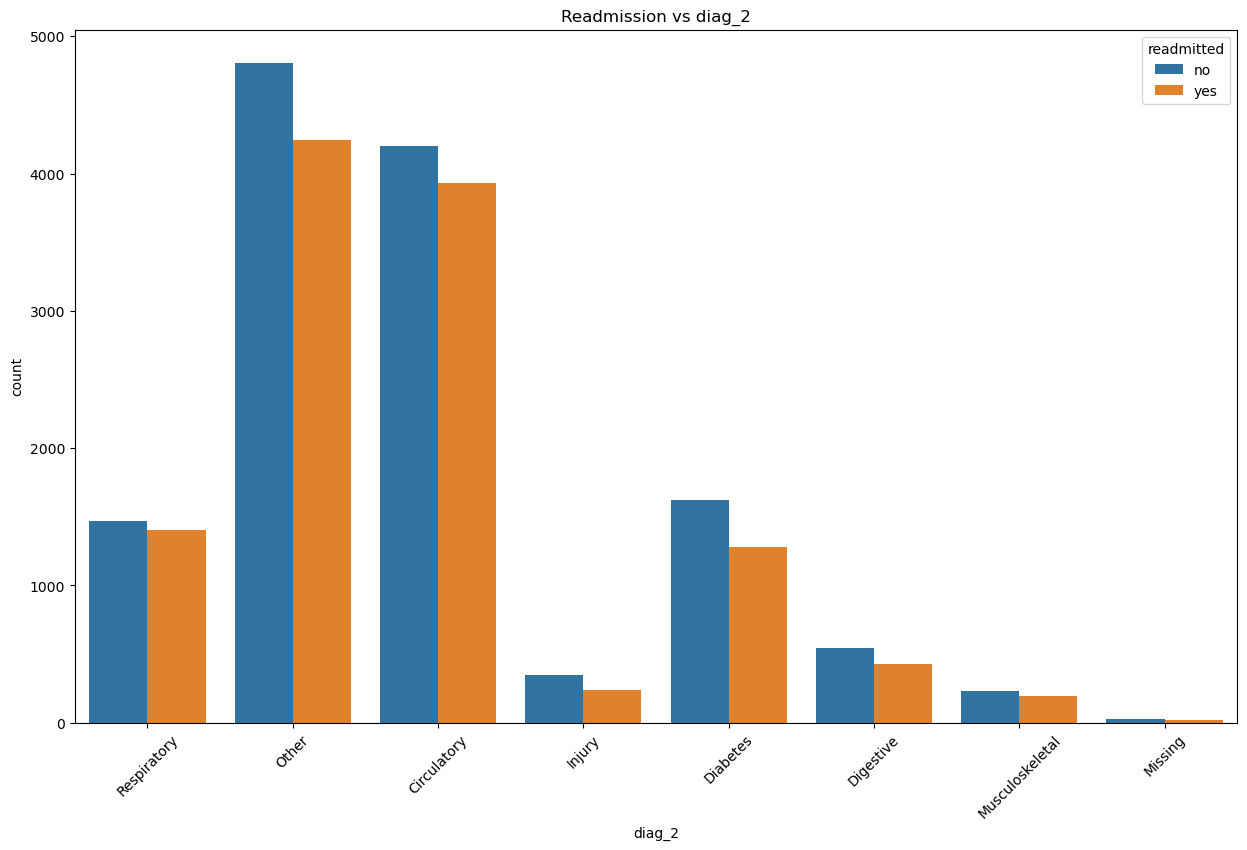

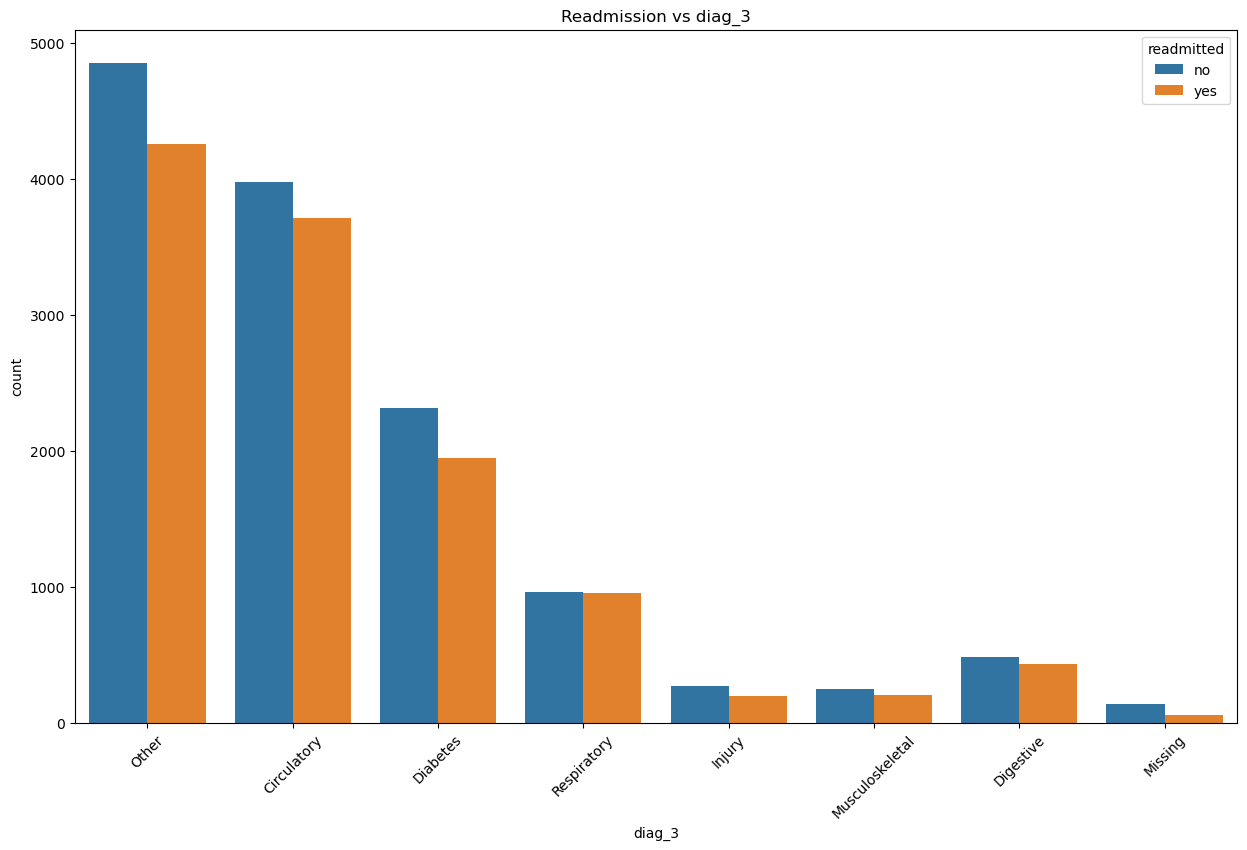

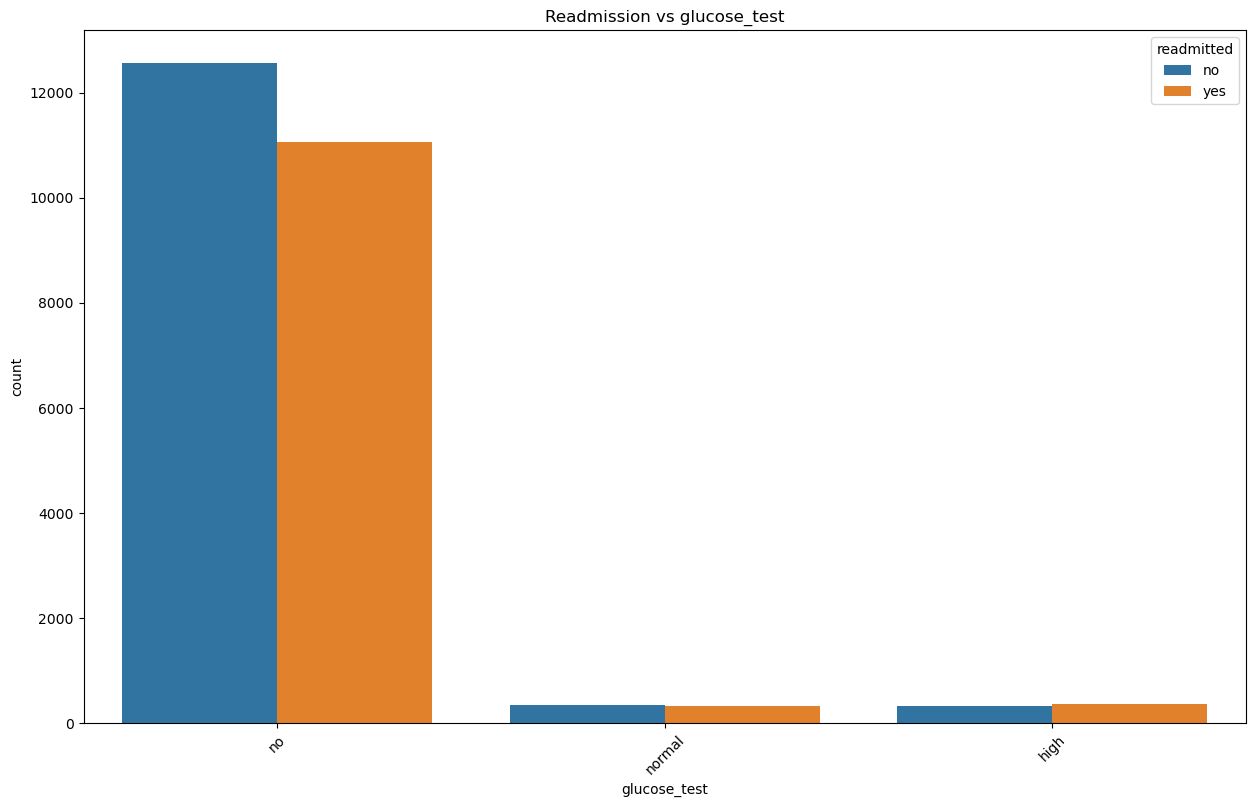

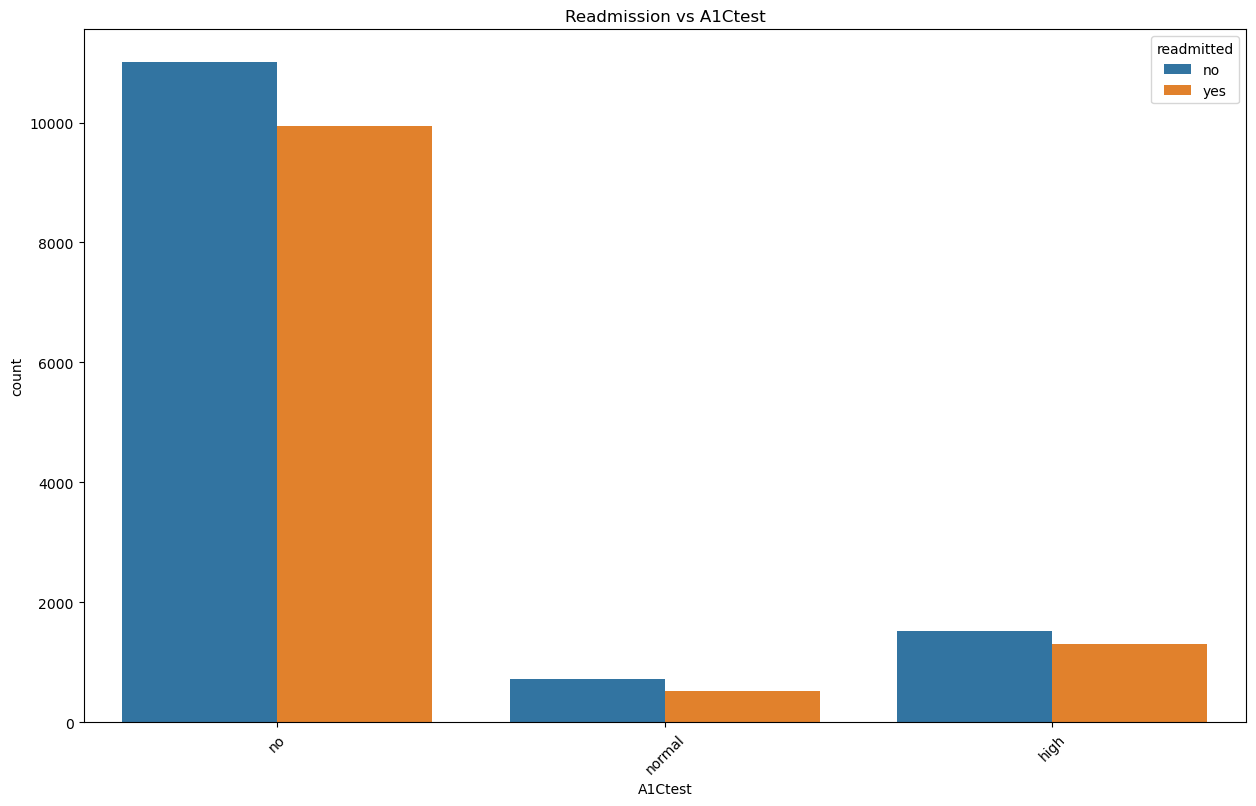

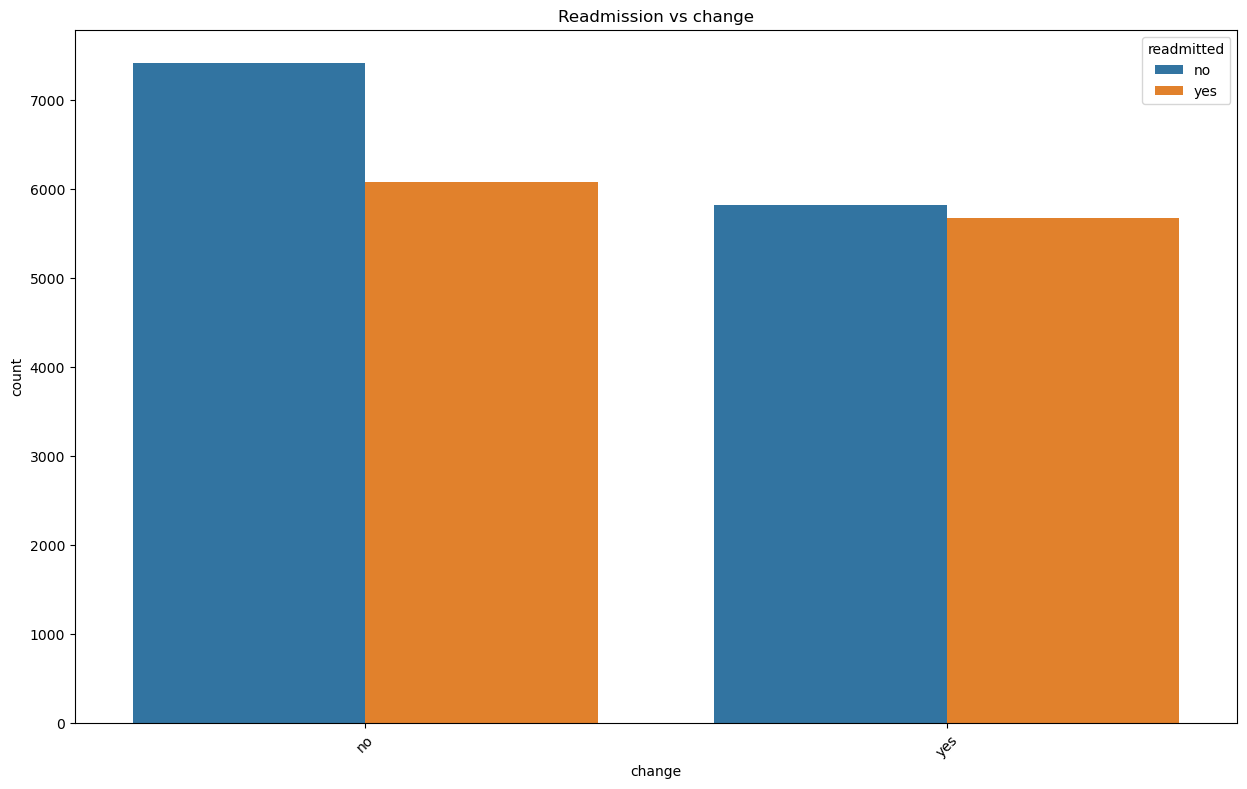

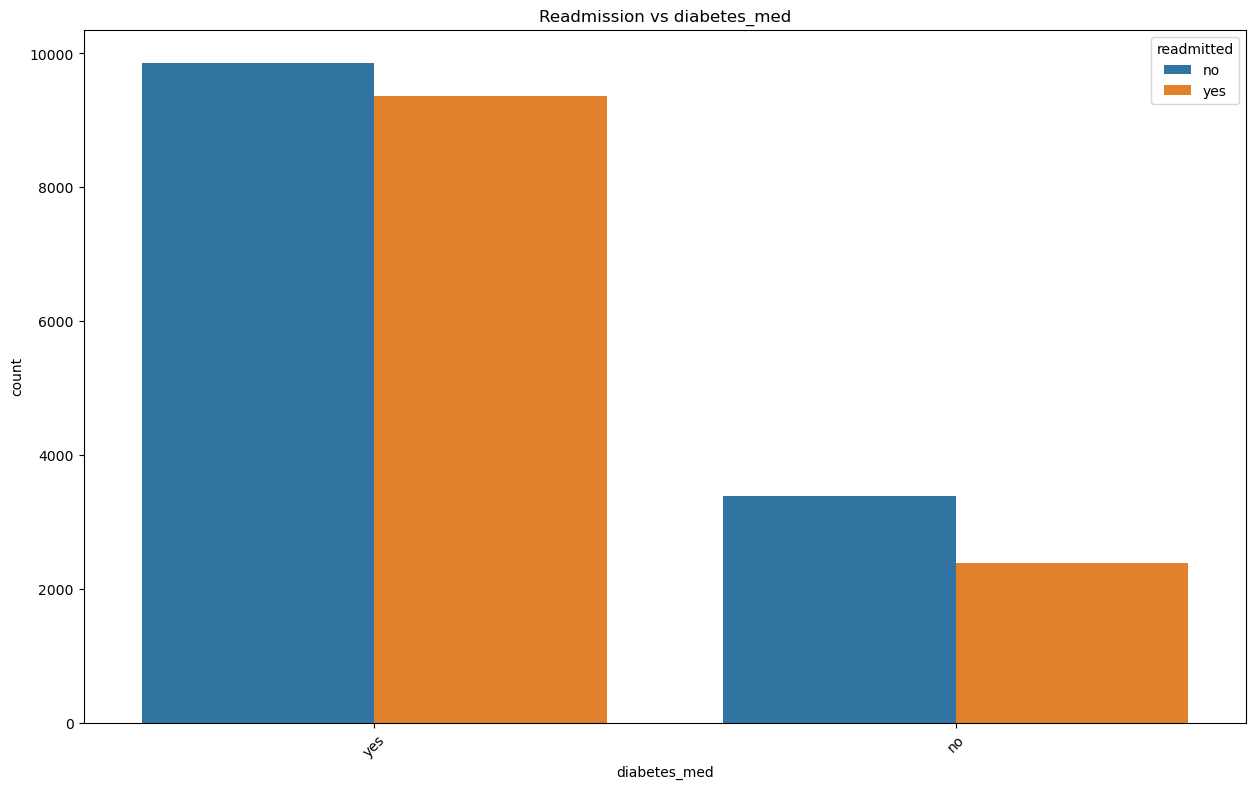

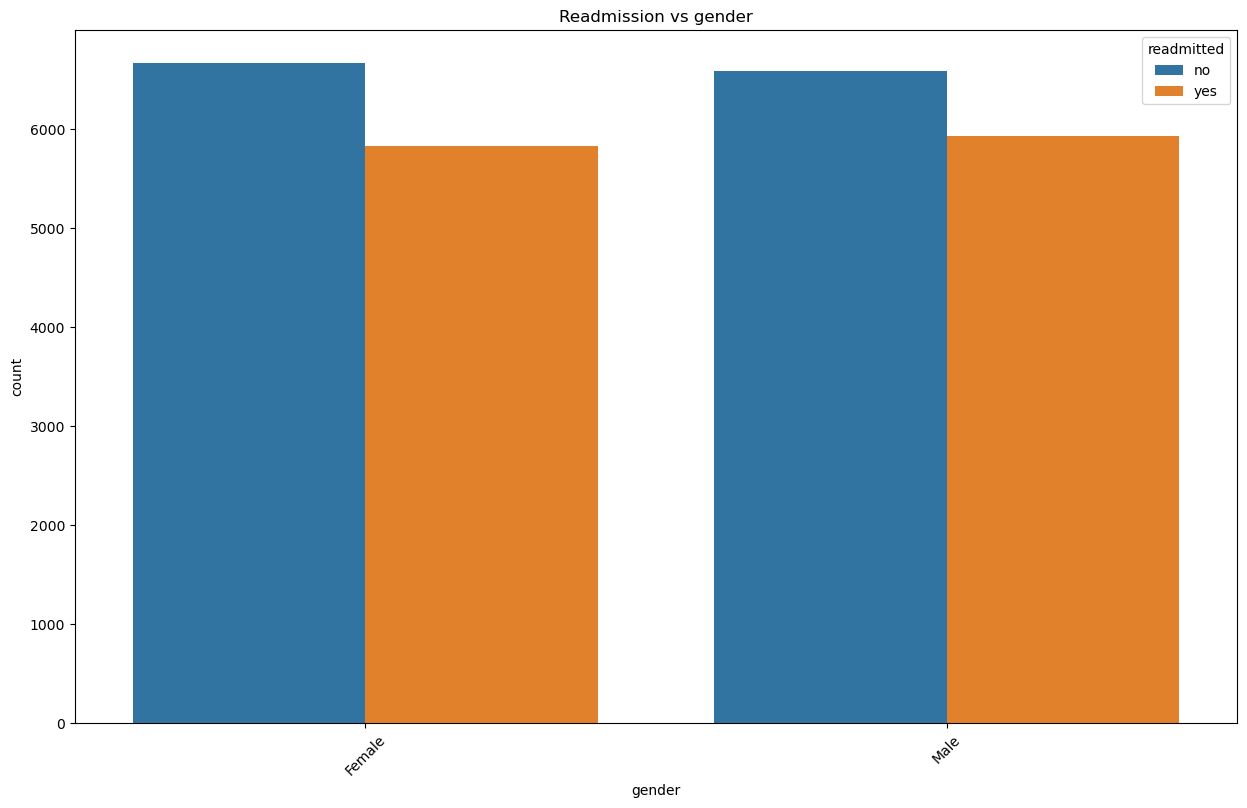

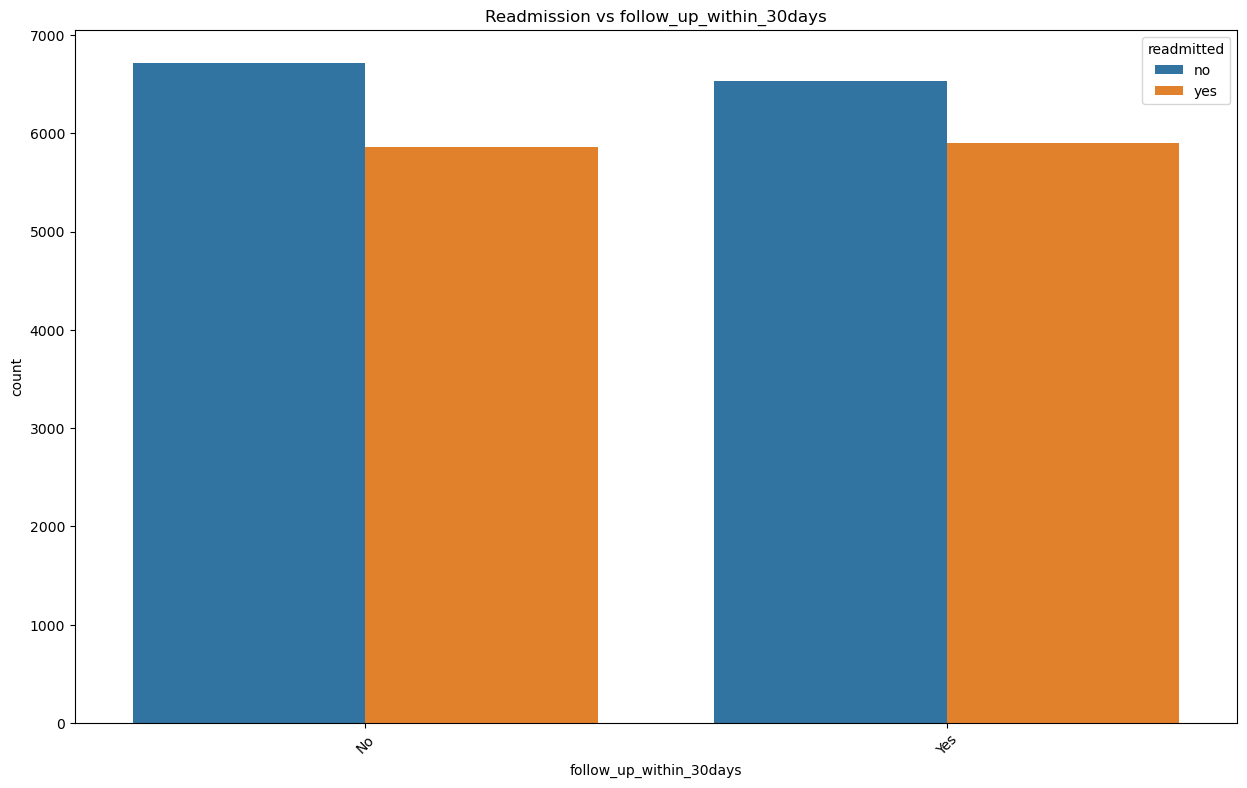

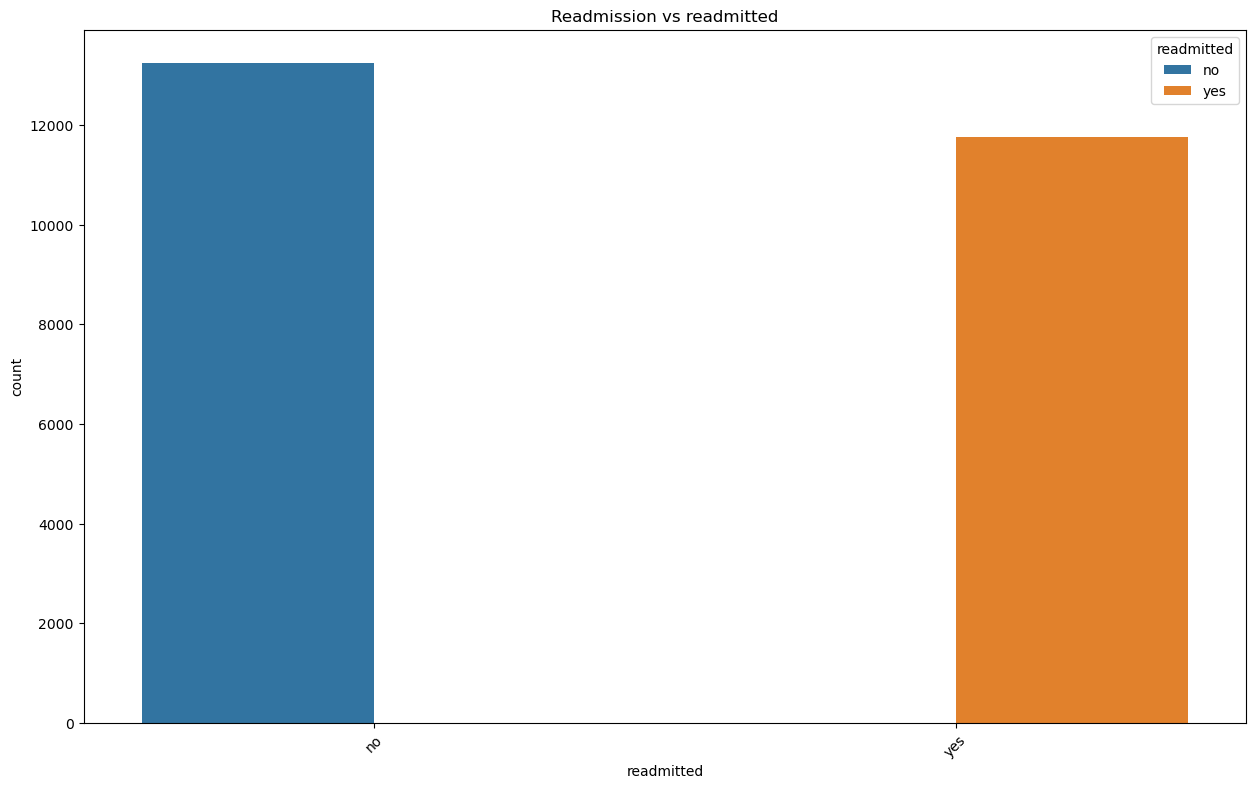

In [3]:
# Define lists of numerical and categorical columns
numerical_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 
                  'n_outpatient', 'n_inpatient', 'n_emergency', 'past_readmissions', 'treatment_intensity']
categorical_cols = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 
                    'A1Ctest', 'change', 'diabetes_med', 'gender', 'follow_up_within_30days', 'readmitted']

# Plot histograms for numerical columns
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis for Numerical Columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
# Plot count distributions for each categorical variable (including the target 'readmitted')
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate Analysis: Compare target 'readmitted' with numerical features using box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='readmitted', y=col, data=df)
    plt.title(f'Readmission vs {col}')
    plt.show()

# Bivariate Analysis: Compare target 'readmitted' with categorical features
for col in categorical_cols:
    plt.figure(figsize=(15, 9))
    sns.countplot(x=col, hue='readmitted', data=df)
    plt.title(f'Readmission vs {col}')
    plt.xticks(rotation=45)
    plt.show()


Explanation:

This cell creates visualizations to analyze the distribution of numerical and categorical variables. It performs univariate analysis to look at the individual distributions of each feature, showing histograms for numerical columns and count plots for categorical columns.
Additionally, bivariate analysis is done to explore how the features relate to the target variable, readmitted. Box plots are used to compare numerical features with the target, while count plots show how the distribution of categorical features varies based on the target variable. This helps understand the data better and how different features might influence readmission rates.

In [4]:
# Convert the 'age' column (given as ranges) to numerical midpoints for easier processing
age_mapping = {
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, 
    '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
df['age'] = df['age'].map(age_mapping)

# Define groups for categorical encoding
nominal_cols = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'gender']
ordinal_cols = ['glucose_test', 'A1Ctest']  # Assumed order: 'no' < 'normal' < 'high'
binary_cols = ['change', 'diabetes_med', 'readmitted', 'follow_up_within_30days']

# --- OneHot Encoding for nominal variables ---
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_nominal = one_hot_encoder.fit_transform(df[nominal_cols])
encoded_nominal_df = pd.DataFrame(encoded_nominal, 
                                  columns=one_hot_encoder.get_feature_names_out(nominal_cols))

# --- Ordinal Encoding for ordinal variables ---
ordinal_encoder = OrdinalEncoder(categories=[['no', 'normal', 'high'], ['no', 'normal', 'high']])
encoded_ordinal = ordinal_encoder.fit_transform(df[ordinal_cols])
encoded_ordinal_df = pd.DataFrame(encoded_ordinal, columns=['glucose_test_encoded', 'A1Ctest_encoded'])

# --- Label Encoding for binary variables ---
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df, encoded_nominal_df, encoded_ordinal_df], axis=1)
# Drop original categorical columns that have now been encoded
df_encoded.drop(columns=nominal_cols + ordinal_cols, inplace=True)

# Display a sample of the transformed data
print("Transformed Data Sample:")
print(df_encoded.head())


Transformed Data Sample:
   age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0   75                 8                72             1             18   
1   75                 3                34             2             13   
2   55                 5                45             0             18   
3   75                 2                36             0             12   
4   65                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency  change  diabetes_med  ...  \
0             2            0            0       0             1  ...   
1             0            0            0       0             1  ...   
2             0            0            0       1             1  ...   
3             1            0            0       1             1  ...   
4             0            0            0       0             1  ...   

   diag_3_Digestive  diag_3_Injury  diag_3_Missing  diag_3_Musculoskeletal  \
0            

Explanation:
In this cell, feature engineering is performed to transform the raw data into a format suitable for machine learning models. The key steps include:

Age Conversion:

The age column, given as ranges (e.g., [70-80)), is converted to numerical midpoints using a mapping. This helps models interpret age as a continuous variable.

Categorical Encoding:

Nominal Features: Columns like medical_specialty, diag_1, diag_2, diag_3, and gender are one-hot encoded to create binary columns for each category, ensuring that the model treats these features without imposing an ordinal relationship.

Ordinal Features: The glucose_test and A1Ctest columns, which have a natural order ('no' < 'normal' < 'high'), are encoded using an ordinal encoder. This preserves the relative order of categories.

Binary Features: Columns such as change, diabetes_med, readmitted, and follow_up_within_30days are label encoded to convert 'yes' and 'no' values to 1 and 0, respectively.

Feature Integration:

The encoded features are concatenated with the original DataFrame, and the original categorical columns are dropped. This step consolidates all features into a numerically encoded form.
Result:

The final transformed DataFrame (df_encoded) is displayed, which is now ready for model training with all features numerically encoded.

In [5]:
# Separate features (X) and target (y)
X = df_encoded.drop(columns='readmitted')
y = df_encoded['readmitted']

# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical columns in the training set for scaling
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing pipeline for numerical columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values
    ('scaler', StandardScaler())  # Scale the values
])

# Apply transformations using ColumnTransformer
column_transformer = ColumnTransformer([
    ('num', num_pipeline, numeric_cols)  # Apply pipeline to numeric columns
])

# Fit and transform the training and test data
X_train_scaled = column_transformer.fit_transform(X_train)
X_test_scaled = column_transformer.transform(X_test)

Explanation:
Here, we split the dataset into training and test sets and then scale the numerical features using StandardScaler. The ColumnTransformer ensures that only the numerical columns are standardized while other features remain unchanged.

In [6]:
# Define candidate models for evaluation
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

results = []  # List to store evaluation metrics for each model

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    # Predict labels and probabilities on the test set
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Compute evaluation metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n{name} Results:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    
    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': roc_auc
    })

# Convert the results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print("\nModel Evaluation Summary:")
print(results_df)

# Select the best model based on AUC-ROC score
best_model_name = results_df.loc[results_df['AUC-ROC'].idxmax()]['Model']
best_model = models[best_model_name]
print(f"\nBest model selected based on AUC-ROC: {best_model_name}")

# Generate and display the confusion matrix for the best model
y_pred_best = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(f"\nConfusion Matrix for {best_model_name}:")
print(conf_matrix)



Logistic Regression Results:
Precision: 0.61
Recall: 0.49
F1 Score: 0.54
AUC-ROC: 0.65

Random Forest Results:
Precision: 0.60
Recall: 0.50
F1 Score: 0.55
AUC-ROC: 0.64

XGBoost Results:
Precision: 0.59
Recall: 0.51
F1 Score: 0.55
AUC-ROC: 0.63

Model Evaluation Summary:
                 Model  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression   0.608115  0.486336  0.540451  0.647846
1        Random Forest   0.598985  0.503843  0.547310  0.641094
2              XGBoost   0.589242  0.514518  0.549350  0.632481

Best model selected based on AUC-ROC: Logistic Regression

Confusion Matrix for Logistic Regression:
[[1924  734]
 [1203 1139]]


c:\Users\srini\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Performance: Justification of Choice of Model and Evaluation Metrics
1. Model Selection:

Logistic Regression: Chosen for interpretability and effectiveness in binary classification.

Random Forest: Used for handling non-linearity and capturing complex patterns.

XGBoost: Selected for its efficiency and ability to handle missing data.

2. Evaluation Metrics:

Precision: To minimize false positives.

Recall: To capture most true positives, crucial if false negatives are costly.

F1 Score: Balances precision and recall.

AUC-ROC: Used for model selection as it evaluates performance across all thresholds.

3. Best Model: Logistic Regression

Selected based on the highest AUC-ROC (0.65) and simplicity.

4. Explanation of Best Model Choice
Best Model: Logistic Regression

Achieved the highest AUC-ROC score (0.65).
Simplest among the evaluated models, reducing the risk of overfitting given similar performance metrics.
Easier to interpret, making it valuable for understanding the influence of different features on predictions.

Why Not Random Forest or XGBoost?

Despite their ability to handle complexity, they did not significantly outperform Logistic Regression.
Higher computational cost without a proportional gain in AUC-ROC or F1 score.

5. Confusion Matrix Analysis for Logistic Regression

Confusion Matrix for Logistic Regression:
[[1904  754]
 [1170 1172]]

Interpretation:

True Positives (1172): Correctly predicted positive cases.

True Negatives (1904): Correctly predicted negative cases.

False Positives (754): Negative cases incorrectly predicted as positive.

False Negatives (1170): Positive cases incorrectly predicted as negative.

Insights:

High false negatives suggest that the model could miss a significant number of positive cases.
Precision and recall are balanced, but a higher recall would be preferable if missing positive cases is costly.

Explanation:
This cell trains three models (Logistic Regression, Random Forest, and XGBoost) and evaluates each using precision, recall, F1 score, and AUC-ROC. The best model is selected based on the highest AUC-ROC score. A confusion matrix is printed for the best-performing model.

⚠️ Warning: Model expects 45 features, but got 48. Adjusting feature set.

🔹 Top 10 Most Important Features:
                      Feature  Importance
6                 n_inpatient    0.447031
7                 n_emergency    0.218385
5                n_outpatient    0.136690
3                n_procedures    0.085138
1            time_in_hospital    0.064448
0                         age    0.059422
18            diag_1_Diabetes    0.058204
37             diag_3_Missing    0.048363
23               diag_1_Other    0.046048
16  medical_specialty_Surgery    0.038045
🔍 Initializing SHAP Explainer...
📊 Generating SHAP values...
📈 Displaying SHAP summary plot...


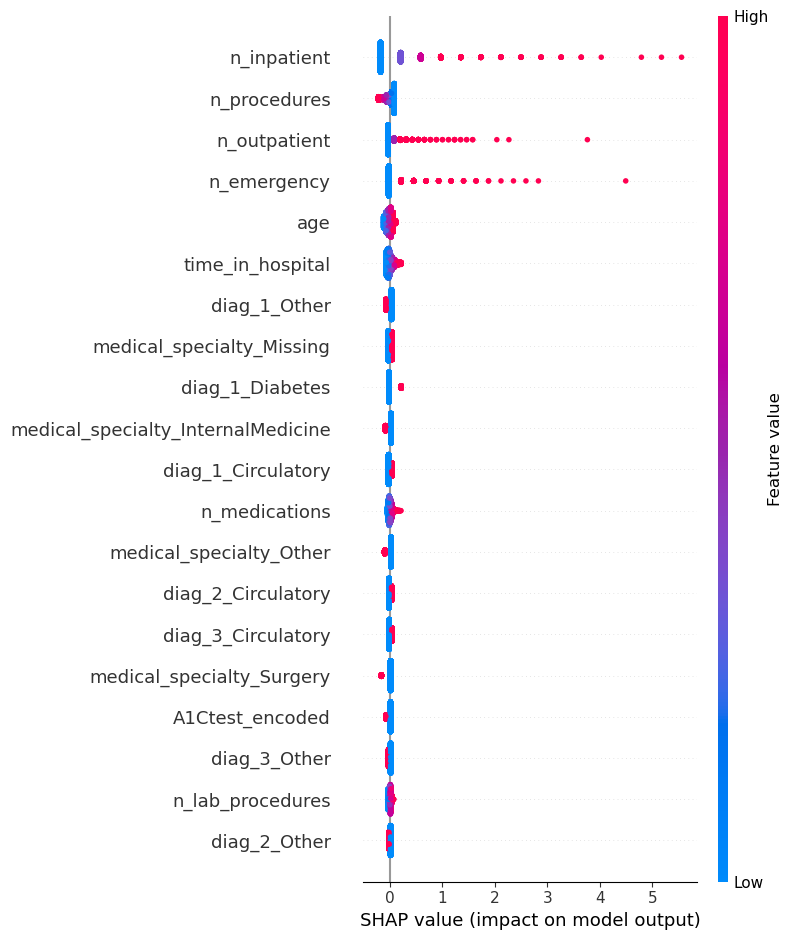

In [7]:
# Ensure feature importance extraction
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
elif hasattr(best_model, "coef_"):
    importances = np.abs(best_model.coef_.flatten())  # Absolute values for logistic regression
else:
    print("⚠️ Model does not support direct feature importance.")
    importances = None

# Ensure filtered_feature_names is properly extracted
if "filtered_feature_names" not in locals():
    def get_feature_names(column_transformer):
        output_features = []
        for name, transformer, features in column_transformer.transformers_:
            if hasattr(transformer, 'get_feature_names_out'):
                output_features.extend(transformer.get_feature_names_out(features))
            else:
                output_features.extend(features)  # Default to feature names
        return output_features
    
    filtered_feature_names = get_feature_names(column_transformer)

# Validate feature importance shape
if importances is not None:
    expected_features = best_model.n_features_in_  # Model's expected features
    actual_features = len(filtered_feature_names)

    if expected_features != actual_features:
        print(f"⚠️ Warning: Model expects {expected_features} features, but got {actual_features}. Adjusting feature set.")

        min_length = min(expected_features, actual_features)
        feature_names_for_importance = filtered_feature_names[:min_length]

        # Trim `X_train_scaled` and `X_test_scaled` to match model's expected feature count
        X_train_scaled = X_train_scaled[:, :min_length]
        X_test_scaled = X_test_scaled[:, :min_length]

        importances = importances[:min_length]
    else:
        feature_names_for_importance = filtered_feature_names

    # Create a feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        "Feature": feature_names_for_importance,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\n🔹 Top 10 Most Important Features:")
    print(feature_importance_df.head(10))

    # --- SHAP Explainability ---
    print("🔍 Initializing SHAP Explainer...")
    explainer = shap.Explainer(best_model, X_train_scaled, feature_names=feature_names_for_importance)

    print("📊 Generating SHAP values...")
    shap_values = explainer(X_test_scaled)

    # Display SHAP summary plot
    print("📈 Displaying SHAP summary plot...")
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, features=X_test_scaled, feature_names=feature_names_for_importance)
    plt.show()


Explanation:
This code checks the best model for feature importance and displays the top 10 most important features based on the model's attributes. It first verifies if the model supports feature importance (via feature_importances_). It creates a DataFrame showing feature names and their corresponding importance, sorted by importance. Additionally, the code uses SHAP to explain the model's predictions by generating a summary plot of how features impact the model's output.

In [8]:
# Bundle the best model, scaler (column_transformer), and label encoder into a dictionary for later use
pipeline_objects = {
    'model': best_model,
    'scaler': column_transformer,
    'encoder': label_encoder
}

# Save the pipeline objects and the feature columns (for reordering during inference)
joblib.dump(pipeline_objects, 'D:/Python/patient_readmission_pipeline.pkl')
joblib.dump(X.columns, 'D:/Python/trained_columns.pkl')
print("\nBest model and pipeline objects saved successfully!")



Best model and pipeline objects saved successfully!


Explanation:
Here we save the trained model, the scaler, and the encoder using joblib. These objects can later be loaded for making predictions on new data. We also save the list of feature columns to ensure proper data alignment during inference.